In [2]:
# Importing core libraries required for the case study
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sea
import datetime as dt
import warnings

## Disabling some deprecation warnings
warnings.filterwarnings('ignore')

loan = pd.read_csv('./dataset/loan.csv', low_memory=False)

loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# Data Dictionary Review
Loading all data dictionary values

In [3]:
dict = pd.read_csv('./dataset/Data_Dictionary.csv')
dict

,LoanStatNew,Description,Status,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,acc_now_delinq,The number of accounts on which the borrower i...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,acc_open_past_24mths,Number of trades opened in past 24 months.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,addr_state,The state provided by the borrower in the loan...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,all_util,Balance to credit limit on all trades,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,annual_inc,The self-reported annual income provided by th...,Not Decided,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
112,verification_status,"Indicates if income was verified by LC, not ve...",Not Decided,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,verified_status_joint,Indicates if the co-borrowers' joint income wa...,Not Decided,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,zip_code,The first 3 numbers of the zip code provided b...,Not Decided,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Cleaning and Manipulation
Aiming to clean and manipulate the data to finally reach a data form where we can work with the data. Will wilcude the following steps while cleaning and manipulating data.
1. Find the number of columns which do not have any data.
2. Drop unwanted and duplicate rows.
3. Dropping text/description columns which will not contribute to overall analysis
4. Dropping column sub_grade as the current analysis will limit to Grade only
5. Dropping all columns which refer to behavioural data of customer post loan approval
6. Dropping columns which is unique id in nature. They dont contribute to loan analysis
7. Dropping all columns where all the values are NA
8. Dropping all columns with all zero values
9. Drop all columns who have constant values (ignoring NA value)
10. Drop the column if the amount of empty values is more than 65%


## Getting the summary of all columns which contain null values
Print summary of Nulls, Blanks in the dataset the ine form a percentage value.

In [4]:
(loan.isnull().sum() / len(loan.index) * 100)

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

## Removing All Rows With loan_status = "Current"
Loan Status - Key Leading Attribute (loan_status). The column has three distinct values
- Fully-Paid - The customer has successfuly paid the loan
- Charged-Off - The customer is "Charged-Off" ir has "Defaulted"
- Current - These customers, the loan is currently in progress and cannot contribute to conclusive evidence if the customer will default of pay in future
**For the given case study, "Current" status rows will be ignored**

In [5]:
prev_rows = len(loan)
# The rows where loan_stats=Current are the data where the loan repayment is currently in progress
# The loans which are currently in progress will not contribute to decisions
# of default or pass as it's difficult to predict the outcome
#
# Dropping the rows early as, dropping all Current rows introduces NA columns which can be easily dropped
loan = loan[loan['loan_status'] != "Current"]

# Print current data statistics after dropping rows with loan_status "CURRENT"
curr_rows = len(loan)
print(curr_rows)
print(prev_rows)

print("Number of rows dropped where loan_status = 'Current':", (prev_rows - curr_rows))
print("Percentage of rows dropped = ", round((prev_rows - curr_rows) / prev_rows * 100, 2), "%")

38577
39717
Number of rows dropped where loan_status = 'Current': 1140
Percentage of rows dropped =  2.87 %


### Find any duplicate rows in the dataset

In [6]:
duplicate_rows = len(loan[loan.duplicated()])
if duplicate_rows <= 0:
    print("Duplicate Rows: ", duplicate_rows)
    print("No action needed")
else:
    print(len(duplicate_rows))

Duplicate Rows:  0
No action needed


### Dropping Columns That Have ID Values
Dropping columns which is unique id in nature. They dont contribute to loan analysis

In [7]:
# Checking if member_id is unique
if len(loan['member_id'].unique()) == loan.shape[0]:
    print("member_id is unique, can be dropped")
    loan = loan.drop(['member_id'], axis=1)
else:
    print("member_id is not unique, dont drop")

# Checking if id is unique
if len(loan['id'].unique()) == loan.shape[0]:
    print("id is unique, can be dropped")
    # not dropping id as it will be used for pivot calculation later
    # loan = loan.drop(['id'],  axis=1)
else:
    print("id is not unique, dont drop")

member_id is unique, can be dropped
id is unique, can be dropped


### Dropping text/description columns which will not contribute to overall analysis
These are names of establishment etc which will not contribute to loan pass or failure. The URL column is a static link with id as the attribute. It's a redundant column

In [8]:
loan = loan.drop(['url', 'emp_title', 'desc', 'title'], axis=1)

### Dropping column sub_grade as the current analysis will limit to Grade only

In [9]:
loan = loan.drop(['sub_grade'], axis=1)

### Dropping all columns which refer to behavioural data of customer post loan approval
Behaviour data of the customers are captured post the loan approval. The data is not available at the time of loan approval and thus cannot be used for calculations

In [10]:
loan = loan.drop(['delinq_2yrs', 'earliest_cr_line',
                  'inq_last_6mths', 'open_acc', 'pub_rec',
                  'revol_bal', 'revol_util', 'total_acc',
                  'out_prncp', 'out_prncp_inv', 'total_pymnt',
                  'total_pymnt_inv', 'total_rec_prncp',
                  'total_rec_int', 'total_rec_late_fee', 'recoveries',
                  'collection_recovery_fee', 'last_pymnt_d',
                  'last_pymnt_amnt', 'last_credit_pull_d',
                  'application_type'], axis=1)

### Dropping all columns whose all the values are NA
Print all NA columns for verification

In [11]:
print("Total columns with values NA: ", len(loan.columns[loan.isna().all()].tolist()),"\n\n")
print("Columns with all values as NA\n", loan.columns[loan.isna().all()].tolist())

# Dropping all the columns whose all the records are NaN or Null
loan = loan.dropna(axis='columns', how="all")

Total columns with values NA:  55 


Columns with all values as NA
 ['next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_7

### Dropping all columns with all zero values

In [12]:
loan = loan.loc[:, (loan != 0).any(axis=0)]

### Function to Drop all columns who have constant values (ignoring NA value)
- Example most of the columns is 1 and rest is NA, the column will be dropped
- If we have 1,2 and NA, the column wont be dropped

In [13]:
print("Columns with constant values with or without NA")
def drop_constant_columns(df):
    for c in df.columns:
        if df[c].nunique(dropna=True) == 1:
            print(c)
            df = df.drop(c, axis=1)
    return df

# Drop all constant columns from df1 (definition of constant is constant value across the rows, this ignores Na values)
loan = drop_constant_columns(loan)

Columns with constant values with or without NA
pymnt_plan
initial_list_status
collections_12_mths_ex_med
policy_code
chargeoff_within_12_mths
tax_liens


### Drop Columns With More Than 65% Empty Values
Function `drop_mostly_empty_columns` which checks the amount of empty values in a dataframe and drops the column if the amount of empty values is more than 65%. 60% is the threshhold percentage which decides imputing vs dropping.

In [14]:
print("Columns with more that 65% empty records")
def drop_mostly_empty_columns(df):
    total_rows = len(df)
    for c in df.columns:
        # Drop columns whose mean na values exceed 65%
        if df[c].isna().mean().round(2) >= 0.65:
            print(c)
            df = df.drop(c, axis=1)
    return df
loan = drop_mostly_empty_columns(loan)

Columns with more that 65% empty records
mths_since_last_delinq
mths_since_last_record


# Data Conversion
Since we have removed unwanted data from the dataset now we can focus on data conversion. During this process we will focus on the following:
1. Converting columns to floats where needed.
2. Converting required columns to integers if they can be converted and exist as strings in dataset.
3. Round off any values in the columns which have floating point values with more than 2 decimal places.
4. Convert the columns loan_amnt and funded_amnt as flot64
5. Convert the term column into an integer from a string
6. Convert int_rate to  float by removing the "%" character
7. Round off the values of key float fields to 2 decimal place
8. Converting the loan_status to boolean column. "Fully-Paid is True and Charged Off is False"
9. Converting the column issue_d from string object to DateTime

#### Convert the columns loan_amnt and funded_amnt as float64

In [15]:
loan = loan.astype({'loan_amnt':'float','funded_amnt':'float'})

#### Convert the term column into an integer from a string

In [16]:
loan['term'] = loan['term'].apply(lambda x : int(x[:-7]))

#### Convert int_rate to  float by removing the "%" character

In [17]:
loan['int_rate'] = loan['int_rate'].apply(lambda x : float(x[:-1]))

#### Round off the values of key float fields to 2 decimal place

In [18]:
print("Rounding columns to 2 decimal places")
for c in ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'dti']:
    print(c)
    loan[c] = loan[c].apply(lambda x: round(x,2))

Rounding columns to 2 decimal places
loan_amnt
funded_amnt
funded_amnt_inv
int_rate
dti


#### Converting the loan_status to boolean column.
"Fully-Paid is True and Charged Off is False"
- Added a function instead of lambda because, if this is accidentally re-run on a boolean column, the logic broke
- Now it will only convert to boolean if the column is a string and has the two specific values

In [19]:
def convert_loan_status_to_boolean(x):
    if x == "Fully Paid":
        return True
    elif x == "Charged Off":
        return False
    else:
        return x

In [20]:
# Converting the column issue_d from string object to DateTime
loan['issue_d'] = pd.to_datetime(loan['issue_d'], format='%b-%y')

### Deciding to Impute Or Drop Columns
Evaluating the percentage of rows with blank values for both the columns. If the total percentage is less than 5% will take an option of dropping the columns vs imputing.

In [21]:
# Identify columns who have blank values and what percentage of total values are there blanks.
# These values may need to be imputed
print('emp_length blank rows', loan['emp_length'].isna().sum())
print('pub_rec_bankruptcies blank rows', loan['pub_rec_bankruptcies'].isna().sum(), "\n")
imp_total = 0
for c in loan.columns[loan.isna().any()].tolist():
    imp_val = len(loan[loan[c].isna()]) / len(loan) * 100
    imp_total += imp_val
    print(c, round(imp_val, 2),"%")
print("\nTotal rows percentage whose columns are blank: ", round(imp_total ,2), "%")

emp_length blank rows 1033
pub_rec_bankruptcies blank rows 697 

emp_length 2.68 %
pub_rec_bankruptcies 1.81 %

Total rows percentage whose columns are blank:  4.48 %


#### Converting emp_length to integer values
Converting emp_length as numerical data to create more effective statistical analysis as compared to nominal values


In [22]:
loan['emp_length'] = loan['emp_length'].replace({'< 1 year': 0, '2 years': 2, '3 years': 3,
                                                 '7 years': 7, '4 years': 4, '5 years': 5,
                                                 '1 year': 1, '6 years': 6, '8 years': 8,
                                                 '9 years': 9,  '10+ years': 10})

In [23]:
# Save the current dimensions of the dataframe in a variable rows_before
rows_before = len(loan)

# Drop rows with empty values in this scenario
Since the percent of rows is very small, dropping the rows instead of imputing them

In [24]:
loan = loan[loan['emp_length'].notna()]
loan = loan[loan['pub_rec_bankruptcies'].notna()]

# Checking if blanks exist
loan['emp_length'].value_counts()

10.0    8369
0.0     4341
2.0     4207
3.0     3951
4.0     3297
5.0     3161
1.0     3077
6.0     2136
7.0     1689
8.0     1410
9.0     1209
Name: emp_length, dtype: int64

In [25]:
# Print the dimensions of the dataframe after dropping rows
rows_after = len(loan)
print("Number of rows dropped = ,", (rows_before - rows_after))
print("Percentage of rows dropped = ", round((rows_before - rows_after)/rows_before*100,2),"%")
print(loan.shape)

Number of rows dropped = , 1730
Percentage of rows dropped =  4.48 %
(36847, 19)


## Deriving Additional Columns
Adding additional column for Year and Month for analysis extracting Year and Month from issue_d

In [26]:
loan['issue_y'] = pd.DatetimeIndex(loan['issue_d']).year
loan['issue_m'] = pd.DatetimeIndex(loan['issue_d']).month

In [27]:
# Diving Months to quarters
def bucket_issue_m(column):
    if column < 4:
        return 'Q1'
    elif (column >= 4) and (column < 7):
        return 'Q2'
    elif (column >= 7) and (column < 9):
        return 'Q3'
    else:
        return 'Q4' # 75% quartile

loan['issue_q'] = loan.apply(lambda x : bucket_issue_m(x['issue_m']), axis = 1)

In [28]:
loan['loan_amnt'].describe()

count    36847.000000
mean     11141.327652
std       7369.988994
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [29]:
# Binning Loan Amount
def bucket_loan_amnt(column):
    if column <= 5000:
        return '0 - 5K'  # 25% quartile
    elif (column >5000) and (column <= 10000):
        return '5K - 10K'
    elif (column >10000) and (column <= 15000):
        return '10K - 15K'
    else:
        return '15K - above' # 75% quartile

loan['loan_amnt_b'] = loan.apply(lambda x : bucket_loan_amnt(x['loan_amnt']), axis = 1)

# Staring With Data Analysis
We start with the analysis of the data that we have till now and see if further cleanup is needed before conduction a uni-variate and bi-variate analysis of the data.

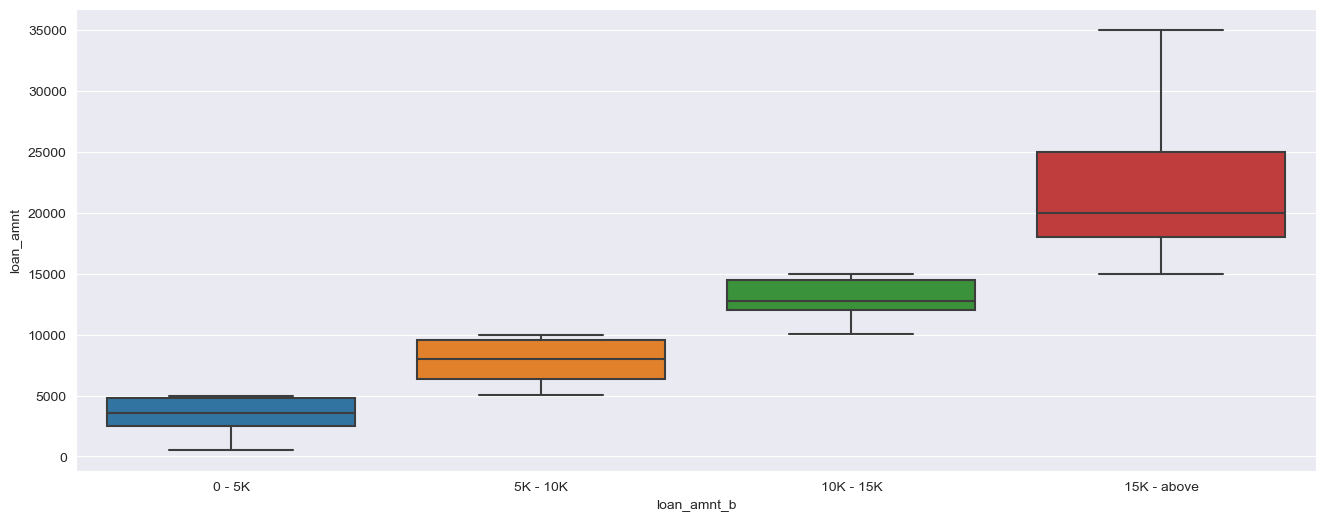

In [30]:
# Plotting and Validating Categories
plot.figure(figsize=(16,6))
sea.boxplot(y=loan.loan_amnt,x=loan.loan_amnt_b)
plot.show()

### Analysing the data in the `funded_amnt_inv` variable

In [31]:
loan['funded_amnt_inv'].describe()

count    36847.000000
mean     10430.400868
std       7008.919433
min          0.000000
25%       5000.000000
50%       9000.000000
75%      14335.045000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

In [32]:
# Binning Funded Amount
def bucket_funded_amnt_inv(column):
    if column <= 5000:
        return '0 - 5K'  # 25% quartile
    elif (column >5000) and (column <= 10000):
        return '5K - 10K'
    elif (column >10000) and (column <= 15000):
        return '10K - 15K'
    else:
        return '15K - above' # 75% quartile

loan['funded_amnt_inv_b'] = loan.apply(lambda x : bucket_funded_amnt_inv(x['funded_amnt_inv']), axis = 1)

### Plotting `funded_amnt_inv` to better understand the data

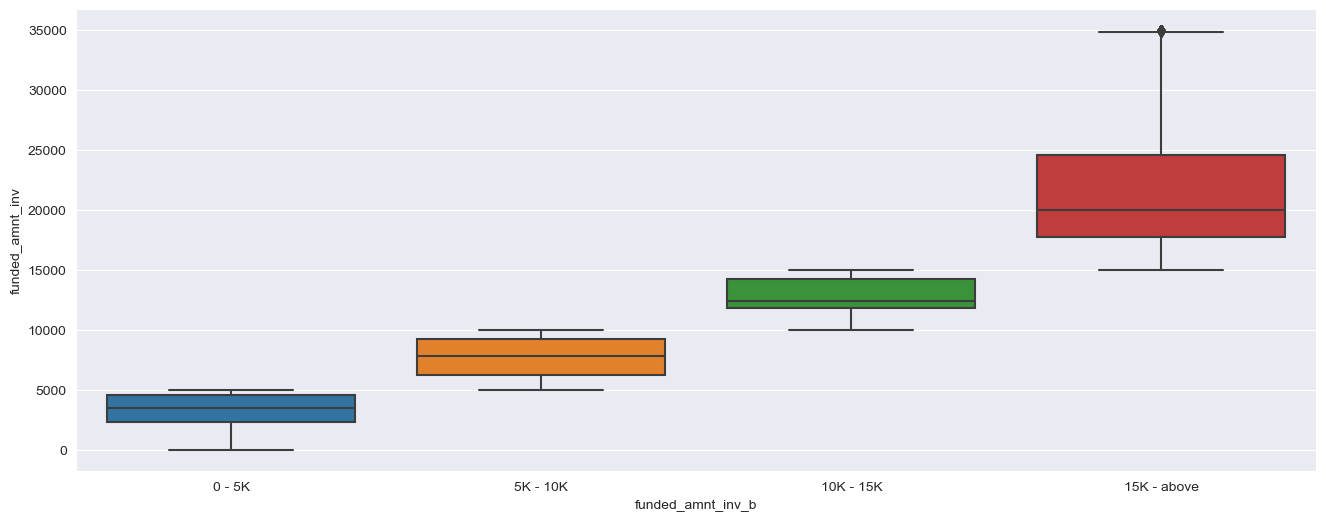

In [33]:
plot.figure(figsize=(16,6))
sea.boxplot(y=loan.funded_amnt_inv,x=loan.funded_amnt_inv_b)
plot.show()

### Analysing the data in the `funded_amnt` variable

In [34]:
loan['funded_amnt'].describe()

count    36847.000000
mean     10872.924526
std       7109.330771
min        500.000000
25%       5400.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

In [35]:
# Binning Funded Amount
def bucket_funded_amnt(column):
    if column <= 5000:
        return '0 - 5K'  # 25% quartile
    elif (column >5000) and (column <= 10000):
        return '5K - 10K'
    elif (column >10000) and (column <= 15000):
        return '10K - 15K'
    else:
        return '15K - above' # 75% quartile

loan['funded_amnt_b'] = loan.apply(lambda x : bucket_funded_amnt(x['funded_amnt']), axis = 1)

### Plotting `funded_amnt` to better understand the data

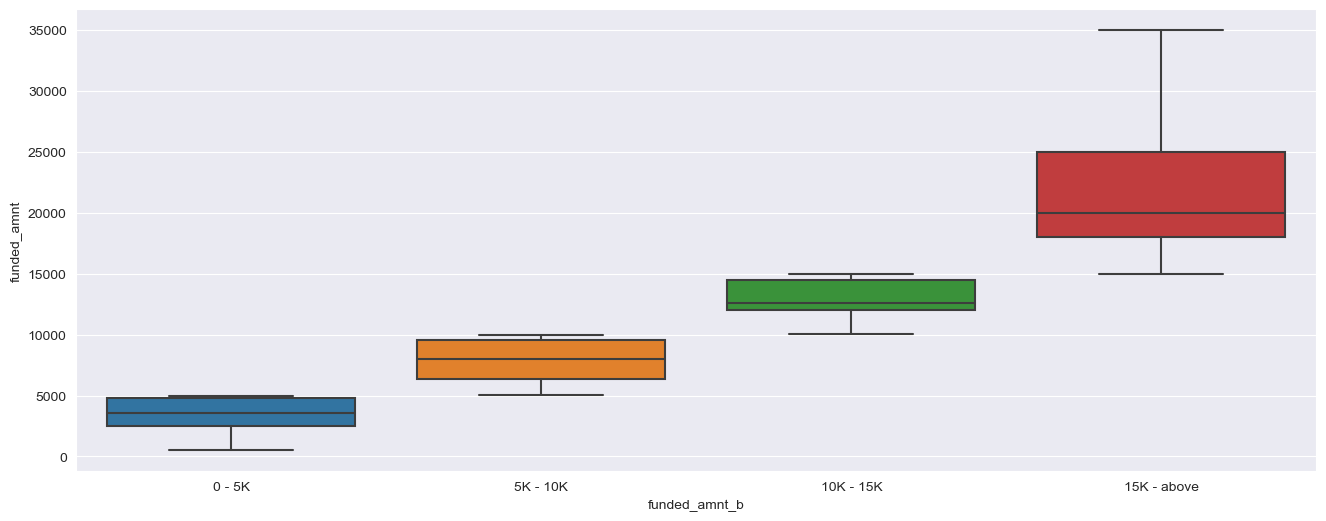

In [36]:
# Validating Categories
plot.figure(figsize=(16,6))
sea.boxplot(y=loan.funded_amnt,x=loan.funded_amnt_b)
plot.show()

### Analysing the data in the `annual_inc` variable

In [37]:
loan['annual_inc'].describe() / 1000

count      36.847000
mean       69.404482
std        64.027473
min         4.000000
25%        41.004000
50%        60.000000
75%        83.000000
max      6000.000000
Name: annual_inc, dtype: float64

In [38]:
# Binning Annual Income
def bucket_annual_inc(column):
    if column <= 40000:
        return '0 - 40k' # 25% quartile
    elif (column >40000) and (column <= 50000):
        return '40k - 50k'
    elif (column >50000) and (column <= 60000):
        return '50k to 60k'
    elif (column >60000) and (column <= 70000):
        return '60k to 70k'
    elif (column >70000) and (column <= 80000):
        return '70k to 80k'
    else:
        return '80k - above' # 75% quartile

loan['annual_inc_b'] = loan.apply(lambda x: bucket_annual_inc(x['annual_inc']), axis = 1)

### Analysing the data in the `int_rate` variable

In [39]:
loan['int_rate'].describe()

count    36847.000000
mean        11.988346
std          3.702091
min          5.420000
25%          8.940000
50%         11.860000
75%         14.520000
max         24.400000
Name: int_rate, dtype: float64

In [40]:
# Binning interest rate
def bucket_int_rate(column):
    if column <= 9:
        return 'Very Low' # 25% quartile
    elif (column >9) and (column <= 11):
        return 'Low'
    elif (column >11) and (column <= 13):
        return 'Moderate'
    elif (column >13) and (column <= 15):
        return 'High'
    else:
        return 'Very High' # 75% quartile

loan['int_rate_b'] = loan.apply(lambda x : bucket_int_rate(x.int_rate), axis = 1)

### Plotting `int_rate` to better understand the data

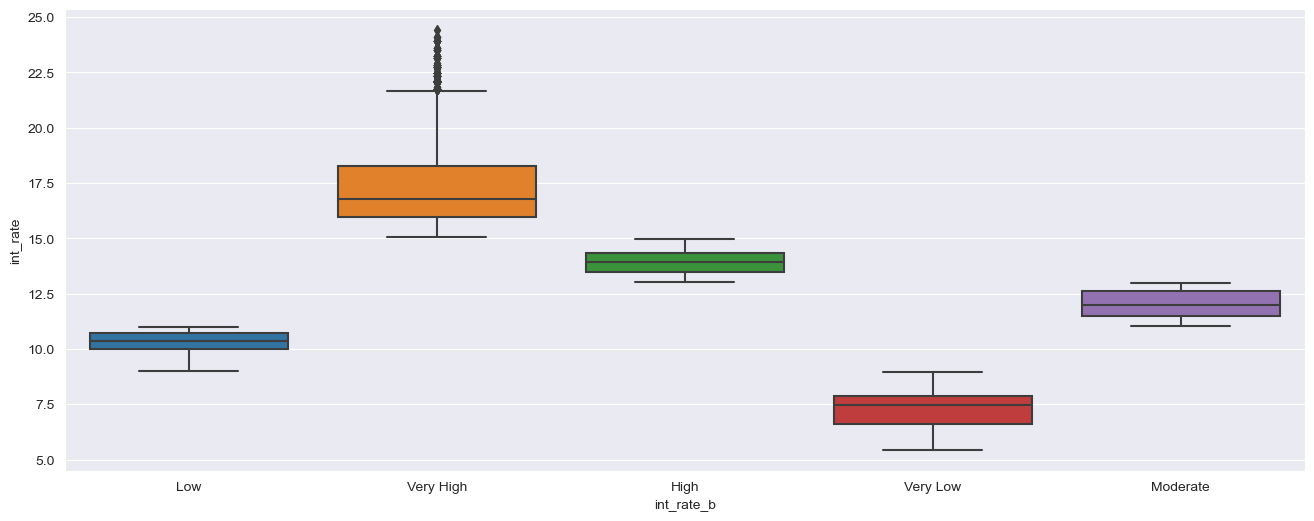

In [41]:
# Validating Categories
plot.figure(figsize=(16,6))
sea.boxplot(y=loan.int_rate,x=loan.int_rate_b)
plot.show()

In [42]:
### Analysing the data in the `dti` variable

In [43]:
loan['dti'].describe()

count    36847.000000
mean        13.330449
std          6.651565
min          0.000000
25%          8.210000
50%         13.420000
75%         18.590000
max         29.990000
Name: dti, dtype: float64

In [44]:
# Binning dti
def bucket_dti(column):
    if column <= 8:
        return 'Very Low' # 25% quartile
    elif (column >8) and (column <= 12):
        return 'Low'
    elif (column >12) and (column <= 16):
        return 'Moderate'
    elif (column >16) and (column <= 20):
        return 'High'
    else:
        return 'Very High' # 75% quartile

loan['dti_b'] = loan.apply(lambda x : bucket_dti(x.dti), axis = 1)

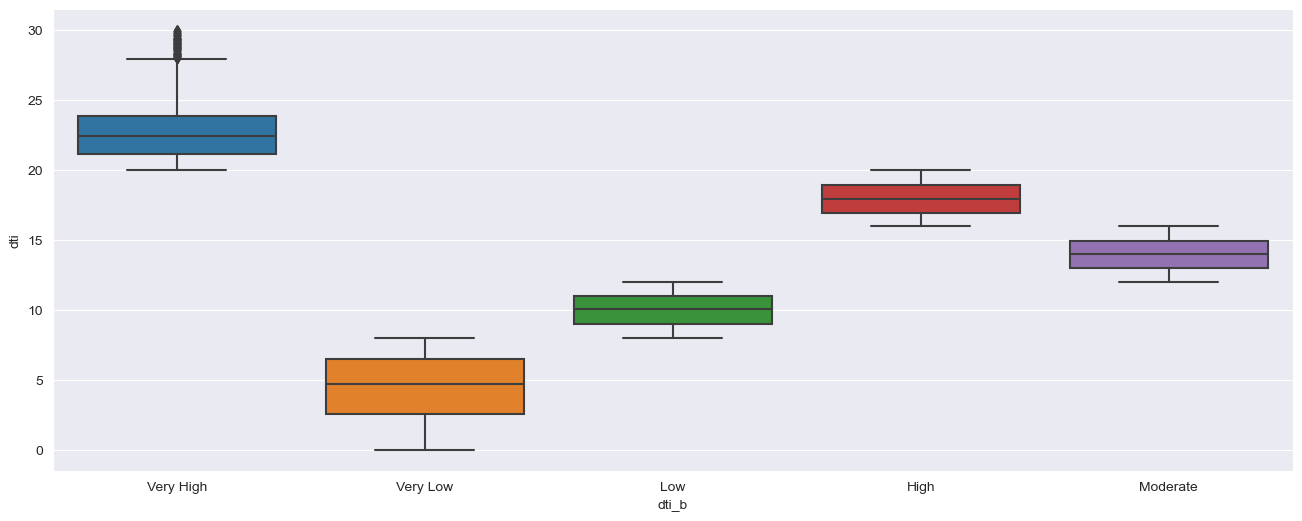

In [45]:
# Validating Categories
plot.figure(figsize=(16,6))
sea.boxplot(y=loan.dti,x=loan.dti_b)
plot.show()

# Re-analysing Data After the Cleanup
This includes the following steps:
1. Printing column info to analyse missing values, empty values in a column
2. Displaying retained columns in the final dataset which will be used for analysis

In [46]:
# Printing column info to analyse missing values, empty values in a column
print(loan.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36847 entries, 0 to 39680
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    36847 non-null  int64         
 1   loan_amnt             36847 non-null  float64       
 2   funded_amnt           36847 non-null  float64       
 3   funded_amnt_inv       36847 non-null  float64       
 4   term                  36847 non-null  int64         
 5   int_rate              36847 non-null  float64       
 6   installment           36847 non-null  float64       
 7   grade                 36847 non-null  object        
 8   emp_length            36847 non-null  float64       
 9   home_ownership        36847 non-null  object        
 10  annual_inc            36847 non-null  float64       
 11  verification_status   36847 non-null  object        
 12  issue_d               36847 non-null  datetime64[ns]
 13  loan_status     

In [47]:
loan.shape

(36847, 28)

In [48]:
loan.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'dti', 'pub_rec_bankruptcies', 'issue_y', 'issue_m',
       'issue_q', 'loan_amnt_b', 'funded_amnt_inv_b', 'funded_amnt_b',
       'annual_inc_b', 'int_rate_b', 'dti_b'],
      dtype='object')

# Univeriate Analysis

In [49]:
# Column metadata used by functions below
column_titles = {
    'loan_amnt': 'Loan Amount',
    'funded_amnt': 'Funded Amount',
    'funded_amnt_inv': 'Funded Amount Investors',
    'term': 'Loan Term',
    'int_rate': 'Interest Rate',
    'installment': 'Installment',
    'grade': 'Grade',
    'emp_length': 'Employment Length',
    'home_ownership': 'Home Owner Status',
    'annual_inc': 'Annual Income',
    'verification_status': 'Verification Status',
    'issue_d': 'Issue Date',
    'loan_status': 'Loan Status',
    'purpose': 'Purpose of Loan',
    'addr_state': 'State',
    'dti': 'Debt To Income Ratio',
    'pub_rec_bankruptcies': 'Bankruptcies Record',
    'issue_y': 'Issue Year',
    'issue_m': 'Issue Month',
    'issue_q': 'Issue Quarter',
    'loan_amnt_b': 'Loan Amount Bins',
    'funded_amnt_inv_b': 'Investor Funded Bins',
    'funded_amnt_b': 'Funded Amount Bins',
    'annual_inc_b': 'Annual Income Bins',
    'int_rate_b': 'Interest Rate Bins',
    'dti_b': 'DTI Bins'
}

## Common Functions
Common functions used while conduction analysis

In [50]:
# This function creates a dictionary of outliers which includes the inter quartile range,
# lower and upper bound for a particular column.
# Formulae used in this analysis
# IQR = 75th Quartile - 25th Quartile
# Lower Bound = 25th Quartile - 1.5 * IQR
# Upper Bound = 75th Quartile + 1.5 * IQR

iqr_multiplier = 1.5

def get_iqr(df, column):
    quar25 = df[column].quantile(0.25)
    quar75 = df[column].quantile(0.75)
    iqr = quar75 - quar25
    lower = quar25 - iqr_multiplier * iqr
    upper = quar75 + iqr_multiplier * iqr
    return {'quartile1': quar25, 'quartile3': quar75, 'iqr': iqr, 'lower_bound': lower, 'upper_bound': upper}


# The function treat outliers, prints a box plot for each column under consideration
# Plot 1 = Before outlier treatment
# Plot 2 = Post outlier treatment
# Also prints statistics of how many rows and percentage of rows dropped
def outlier_comparison(df, column):
    # box plot before dropping outliers
    fig, p = plot.subplots(1,2,figsize=(14, 3))
    splot1 = sea.boxplot(df[column], ax=p[0], orient="h")
    splot1.set_title('Plot ['+ column + '] - Original')
    new_df = df[df[column] < get_iqr(df, column)['upper_bound']]
    # box plot after dropping outliers
    splot2 = sea.boxplot(new_df[column], ax=p[1])
    splot2.set_title('Plot [' + column + '] - Post Outlier Treatment')
    plot.tight_layout()
    plot.show()

def drop_outlier(df, column):
    old_rows = len(df)
    new_df = df[df[column] < get_iqr(df, column)['upper_bound']]
    new_rows = len(new_df)
    print('Rows dropped: ', old_rows - new_rows)
    print('Percentage rows dropped: ', round((old_rows - new_rows)/old_rows*100,2), "%")
    return new_df

In [51]:
def univariate_analysis(df, column):
    fig, p = plot.subplots(1,2, figsize=(16, 4))
    sea.distplot(df.loc[df[column].notnull(), column], kde=True, hist=True, ax=p[0])
    sea.boxplot(x=column, data=df, ax=p[1])
    p[0].set_xlabel(column_titles[column])
    p[1].set_xlabel(column_titles[column])
    plot.tight_layout()
    plot.show()

In [52]:
# Bivariate analysis of columns against loan_status and calculate the ratio of Charge Offs
def analysis_vs_loan_status(df, col):
    fig, p = plot.subplots(1,2, figsize=(16, 4))
    splot = sea.countplot(df[col], ax=p[0])
    splot.set_xticklabels(splot.get_xticklabels(), rotation=90);
    p[0].set_title('['+ col + '] - loan_status=all')
    cross_tab = pd.crosstab(df[col], df['loan_status'], normalize='index')
    cross_tab.plot.bar(ax=p[1], stacked=True)
    p[1].set_title('['+ col + '] - Stacked')
    plot.show()


def continious_column_analysis(df, column):
    f, (ax1, ax2) = plot.subplots(nrows=1, ncols=2, figsize=(16,4))
    sea.distplot(df.loc[df[column].notnull(), column], kde=True, hist=True, ax=ax1)
    sea.boxplot(x=column, y='loan_status', data=df, ax=ax2)
    ax1.set_xlabel(column_titles[column])
    ax2.set_xlabel(column_titles[column] + 'by Loan Status')
    plot.tight_layout()
    plot.show()
    # return group by dataframe for display comparison
    return df.groupby('loan_status')[column].describe()

def comparison_loan_status(df, column):
    df.groupby('loan_status')[column].value_counts().unstack().plot(kind='bar', figsize=[16,4])
    plot.show()


def ratio_wise(df, column):
    rw = df.pivot_table(index=column, columns='loan_status', values='id', aggfunc=len).reset_index()
    rw['total'] = rw['Charged Off'] + rw['Fully Paid']
    rw['charge_off_ratio'] = round(rw['Charged Off'] / rw['total'] * 100)
    rw.sort_values(by='total', ascending=False)
    return rw

def ratio_wise_plot(df, column, invert=False):
    plot.figure(figsize=[20,8])
    plot.title('Charged Off : ' + column_titles[column])
    rw = ratio_wise(df, column)
    if invert:
        sea.barplot(rw['charge_off_ratio'], rw[column])
    else:
        sea.barplot(rw[column], rw['charge_off_ratio'])
    plot.tight_layout()
    plot.show()
    return rw

def series_plot(df, column, hue=None, annot=1):
    temp = pd.Series()
    fig, ax = plot.subplots(figsize=(20,14))
    width = len(df[column].unique()) + 6 + 4 * len(temp.unique())
    fig.set_size_inches(width , 7)
    ax = sea.countplot(data = df, x=column, order=df[column].value_counts().index, hue=hue)
    if annot == 1:
        for p in ax.patches:
            ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(df))), (p.get_x()+0.05, p.get_height()+20))
    elif annot == 2:
        for p in ax.patches:
            ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20))
    del temp
    plot.show()

--------------------------------

# Treating Outliers
Outlier treatment of the key variables and drop the outliers for cleaner data analysis

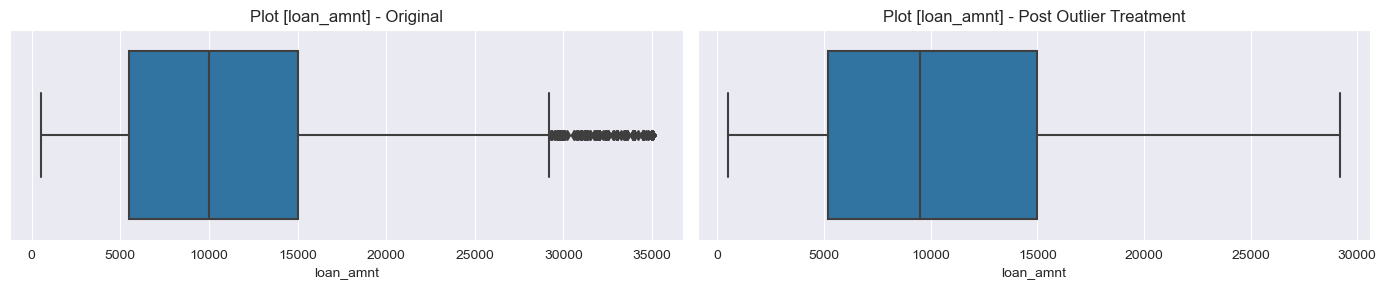

Rows dropped:  1078
Percentage rows dropped:  2.93 %


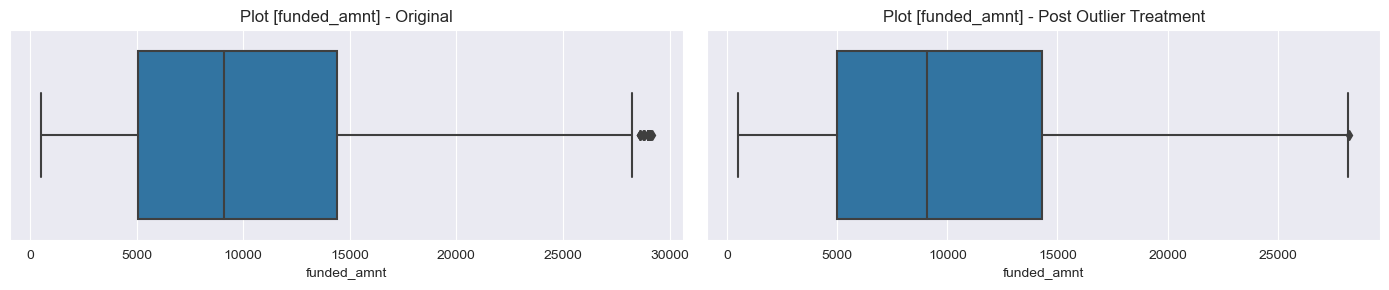

Rows dropped:  30
Percentage rows dropped:  0.08 %


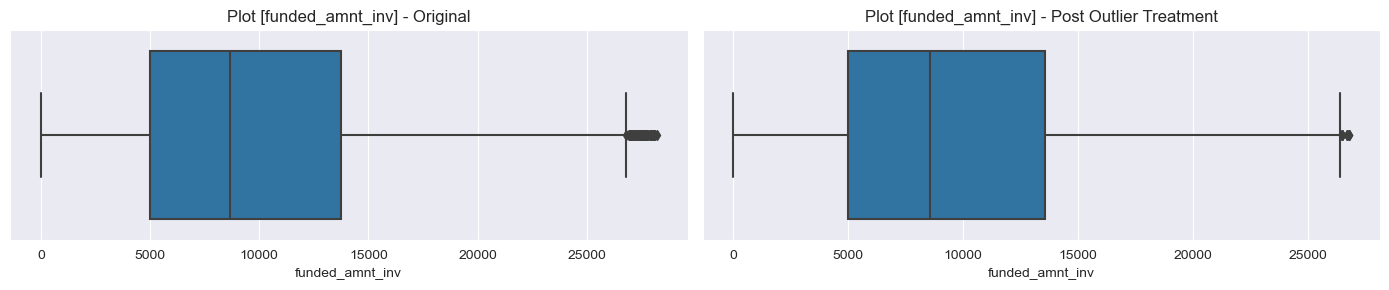

Rows dropped:  153
Percentage rows dropped:  0.43 %


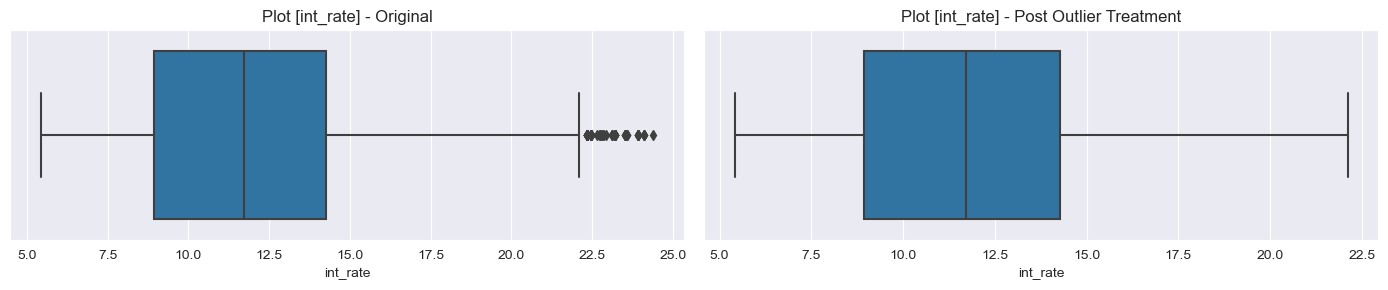

Rows dropped:  63
Percentage rows dropped:  0.18 %


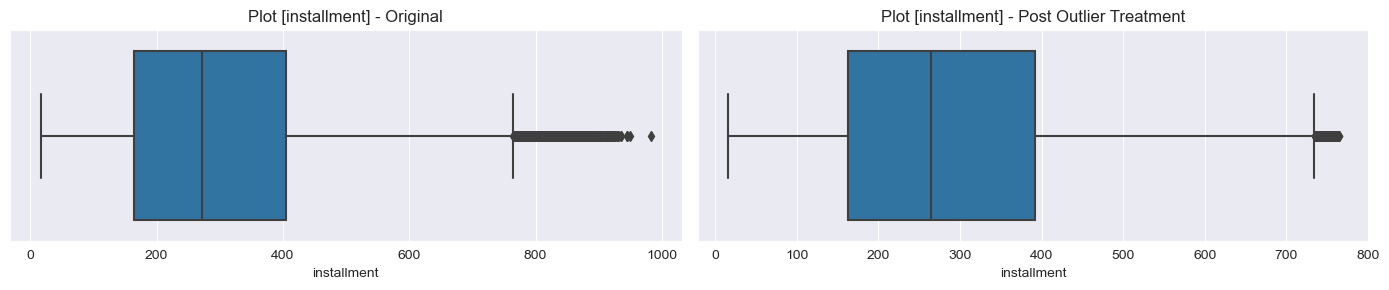

Rows dropped:  981
Percentage rows dropped:  2.76 %


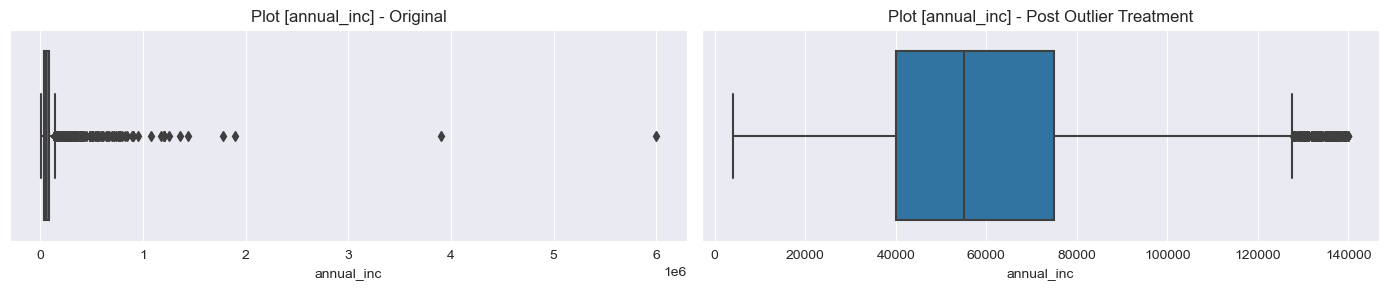

Rows dropped:  1486
Percentage rows dropped:  4.3 %


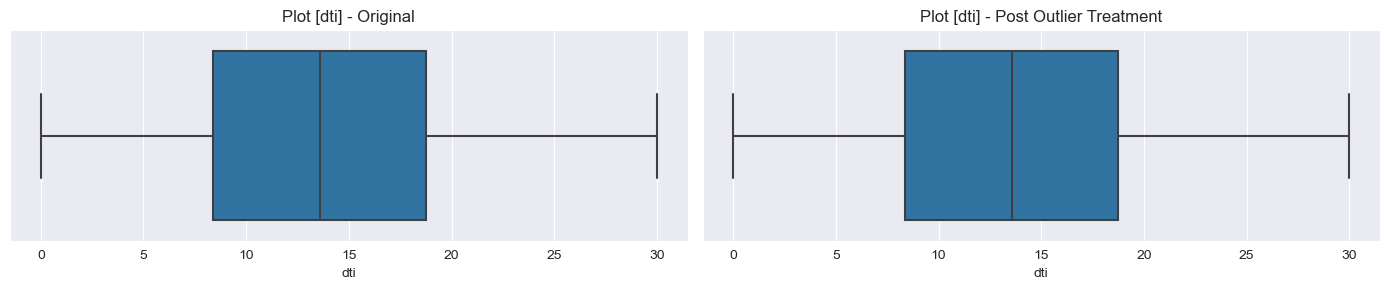

Rows dropped:  0
Percentage rows dropped:  0.0 %


In [53]:
original_row_count = len(loan)

outlier_treatment = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti']
for column in outlier_treatment:
    outlier_comparison(loan, column)
    loan = drop_outlier(loan, column)

# Identifying And Analysing Quantitative Variables
Quantitative variables are any variables where the data represent numbers.


### loan_amnt

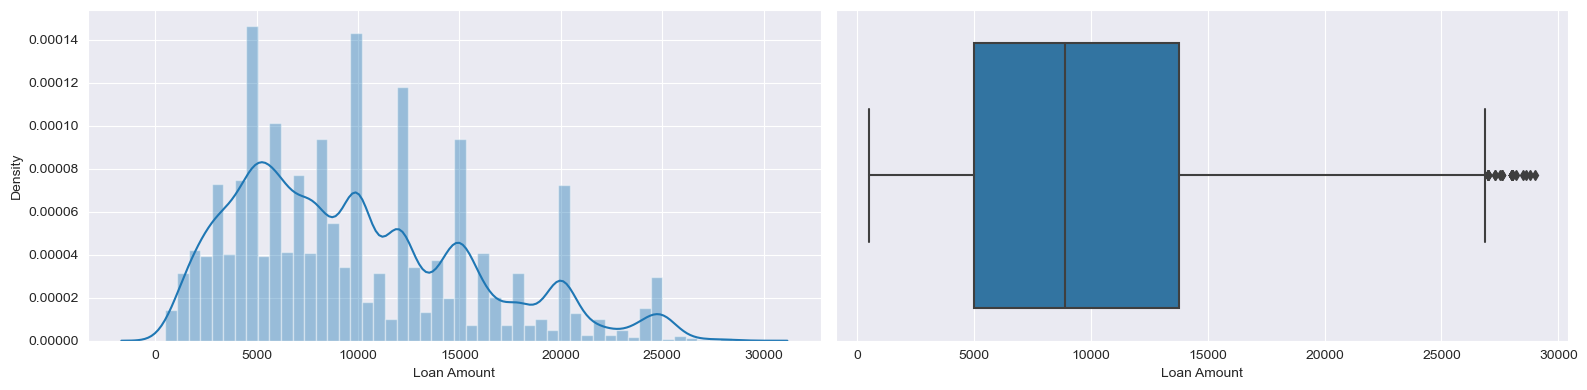

In [54]:
univariate_analysis(loan, 'loan_amnt')

> Outcome: Most of the loan_amount is in the range of 5K to 14K

### funded_amnt

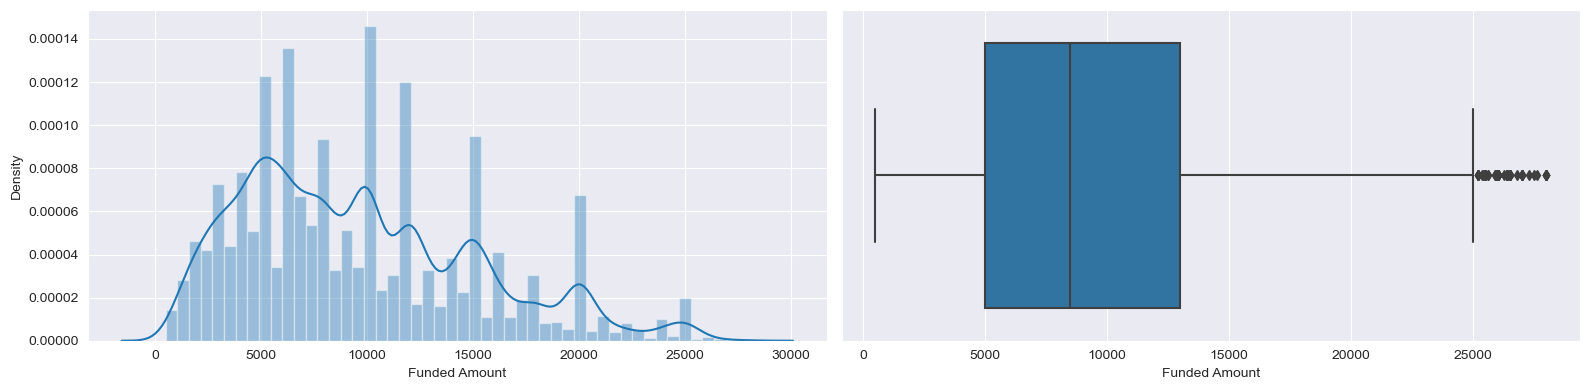

In [55]:
univariate_analysis(loan, 'funded_amnt')

> Outcome: Most of the funded_amnt is in the range of 5K to 13K

### funded_amnt_inv

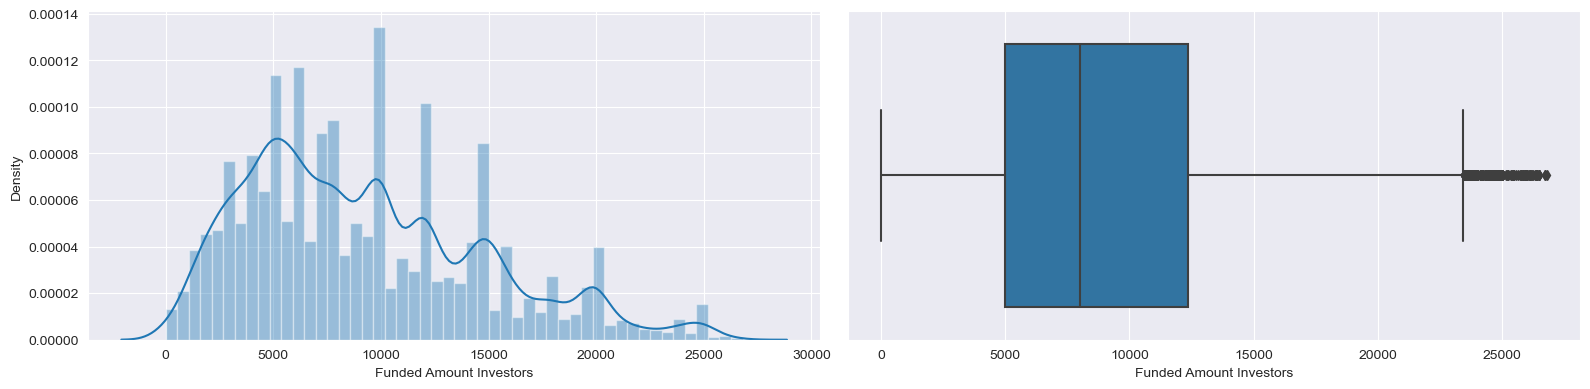

In [56]:
univariate_analysis(loan, 'funded_amnt_inv')

> Outcome: Most of the funded_amnt_inv is in the range of 5K to 12K

### int_rate

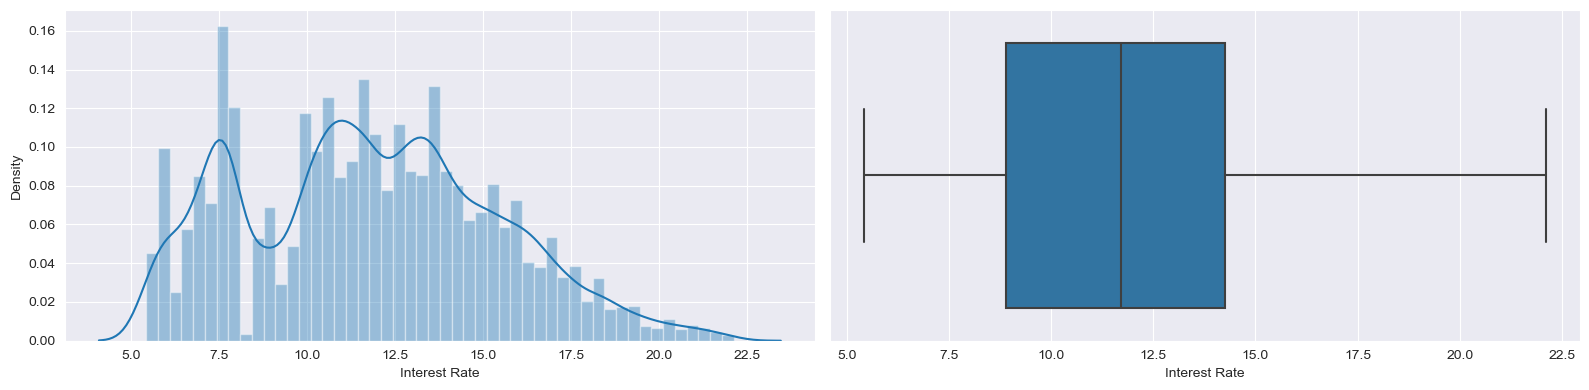

In [57]:
univariate_analysis(loan, 'int_rate')

> Outcome: Most of the interest rate is in the range of 5% to 16% going at the max to 22%

### installment

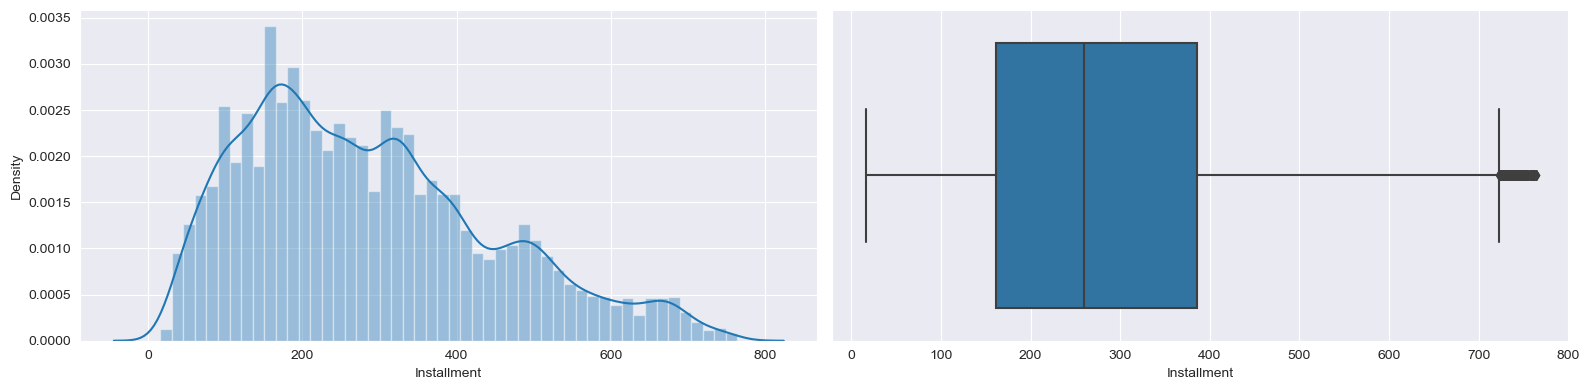

In [58]:
univariate_analysis(loan, 'installment')

> Outcome: Most of the installment are in the range of 20 to 400 going at the max to 700

### annual_inc

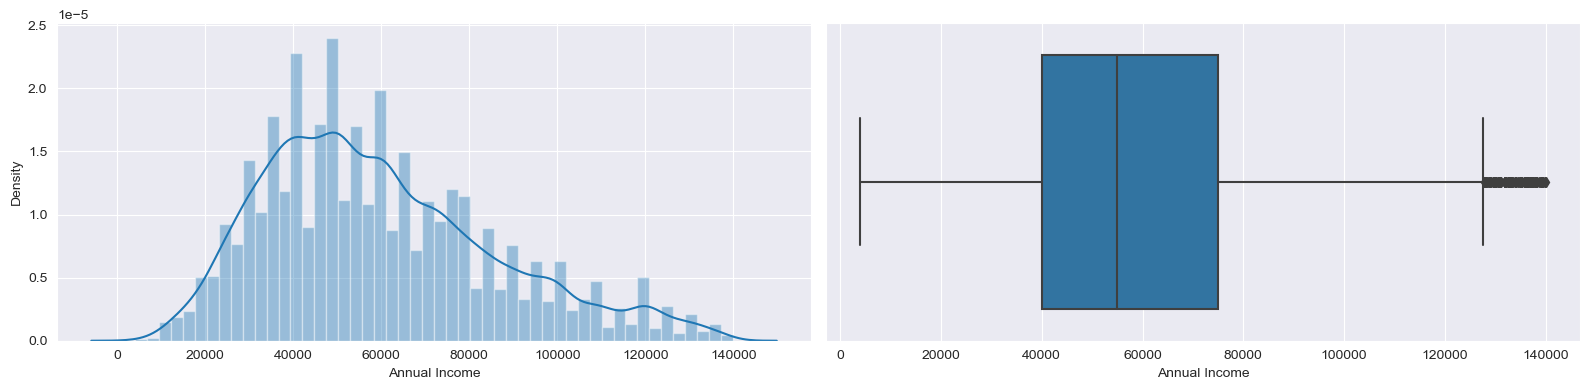

In [59]:
univariate_analysis(loan, 'annual_inc')

>Outcome: Most of the annual income are in the range of 4k to 40k going at the max to 120k. This column required major outlier treatment.

### dti

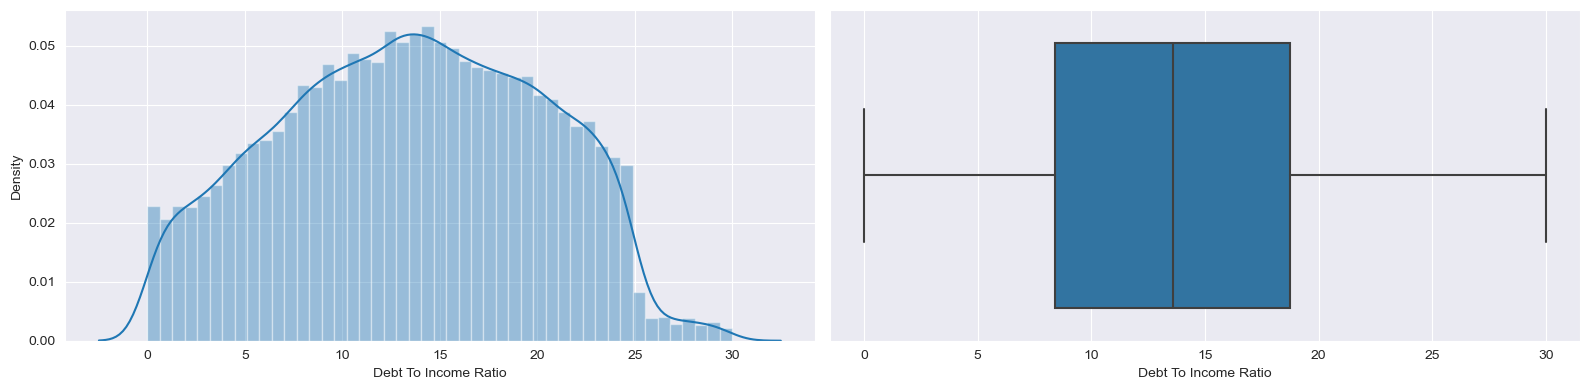

In [60]:
univariate_analysis(loan, 'dti')

> Outcome: Most of the debt to income is in the range of 0 to 20 going at the max to 30

-----

# Unordered Categorical Variable Analysis

### home_ownership

<AxesSubplot:>

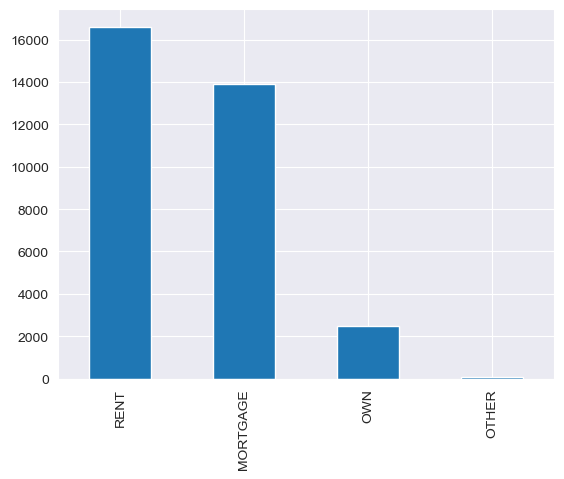

In [61]:
loan['home_ownership'].value_counts().plot.bar()

> Outcome: Most of the home owner status are in status of RENT and MORTGAGE

### purpose

<AxesSubplot:>

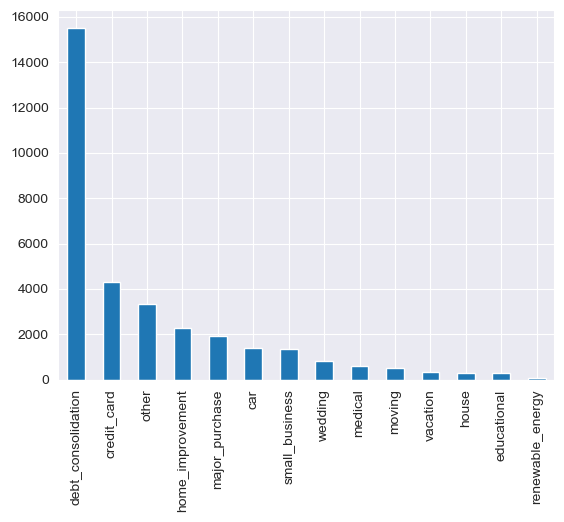

In [62]:
loan['purpose'].value_counts().plot.bar()

> Outcome: Most of loan application are in the category of debt_consolidation

### addr_state

<AxesSubplot:>

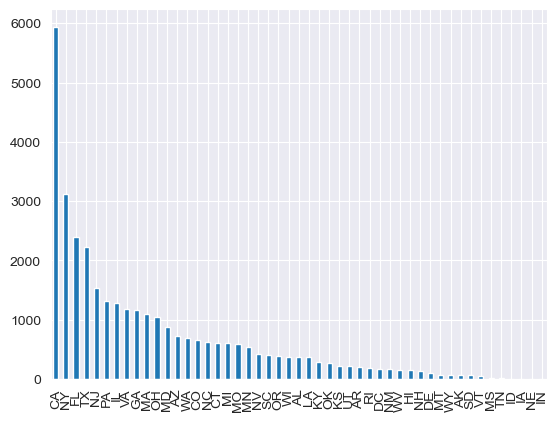

In [63]:
loan['addr_state'].value_counts().plot.bar()

Outcome: CA state has the maximum amount of loan applications

--------
# Ordered Categorical Variable Analysis

### term

<AxesSubplot:>

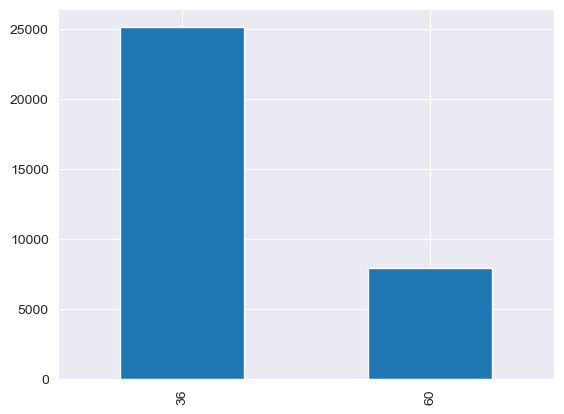

In [64]:
loan['term'].value_counts().plot.bar()

> Outcome: Most of the loan applications counts are in the term of 36 months.

### grade

<AxesSubplot:>

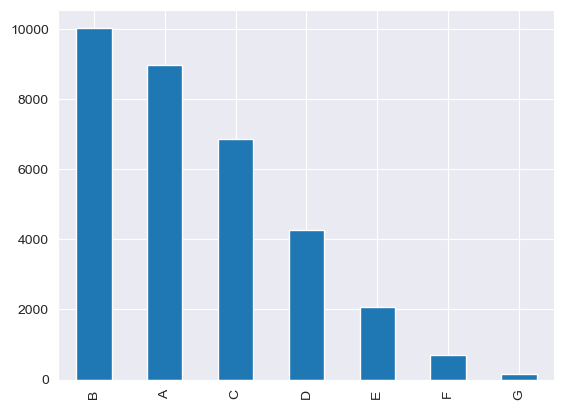

In [65]:
loan['grade'].value_counts().plot.bar()

> Outcome: Most of the loan application counts fall under the category of Grade B

### emp_length

<AxesSubplot:>

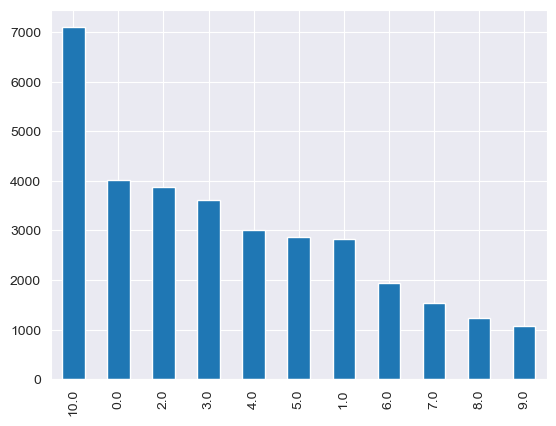

In [66]:
loan['emp_length'].value_counts().plot.bar()

> Outcome: Most of the employment length of the customers are 10+ years and then in the range of 0-2 years

### pub_rec_bankruptcies

<AxesSubplot:>

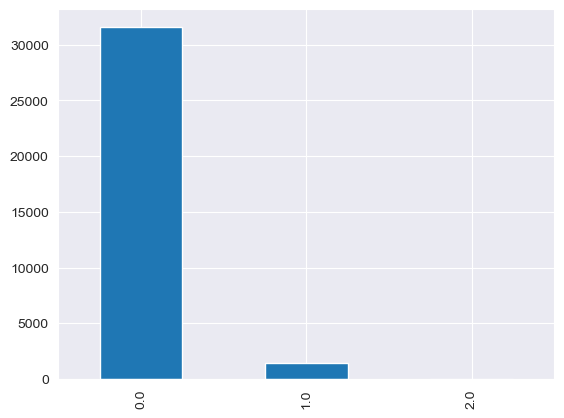

In [67]:
loan['pub_rec_bankruptcies'].value_counts().plot.bar()

> Outcome: Most of the loan applicants are in the category of not having an public record of bankruptcies

----
# Derived Variable Analysis

### issue_y

<AxesSubplot:>

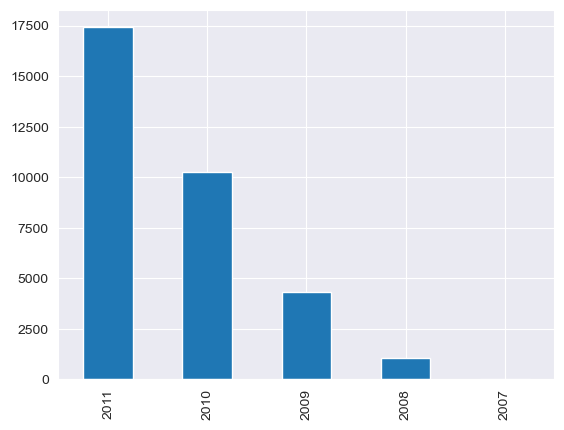

In [68]:
loan['issue_y'].value_counts().plot.bar()

> Outcome: Loan application counts are increasing year over year. Maybe the risk exposure is increasing over the year (un proven hypothesis)

### issue_m

<AxesSubplot:>

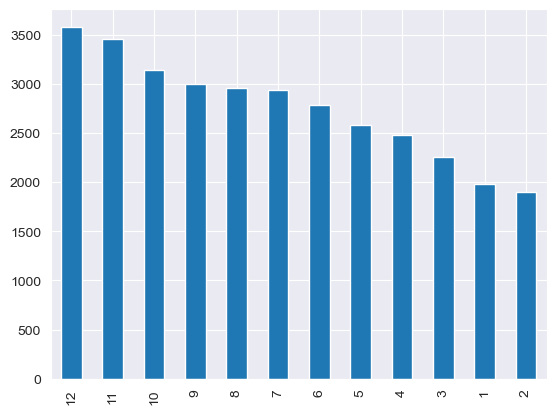

In [69]:
loan['issue_m'].value_counts().plot.bar()

The lowest loans applocation count are in the month of Jan/Feb/March and highest counts are in 10/11/12.

- Possibly because by year ends people face the financial challenges
- Possibly because of festive seasons
- Possibly because they are consolidating debt by year end

### issue_q

<AxesSubplot:>

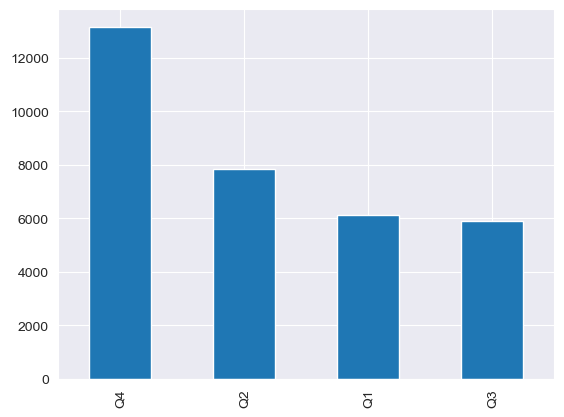

In [70]:
loan['issue_q'].value_counts().plot.bar()

> Outcome: Highest loan application volume in Quarter 4 of a year

### loan_amnt_b

<AxesSubplot:>

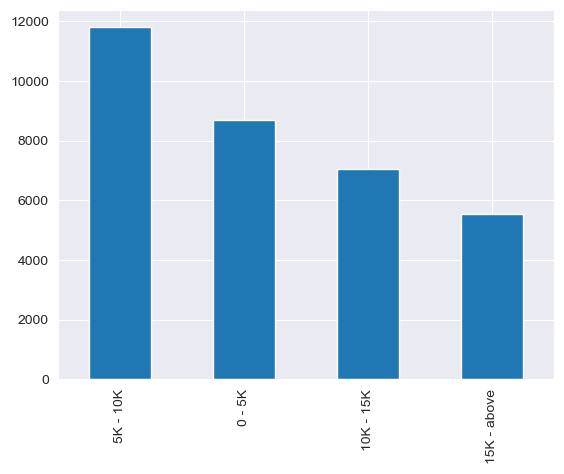

In [71]:
loan['loan_amnt_b'].value_counts().plot.bar()

> Outcome: Highest loan amount applications fall in the range of 5k to 10k

### funded_amnt_inv_b

<AxesSubplot:>

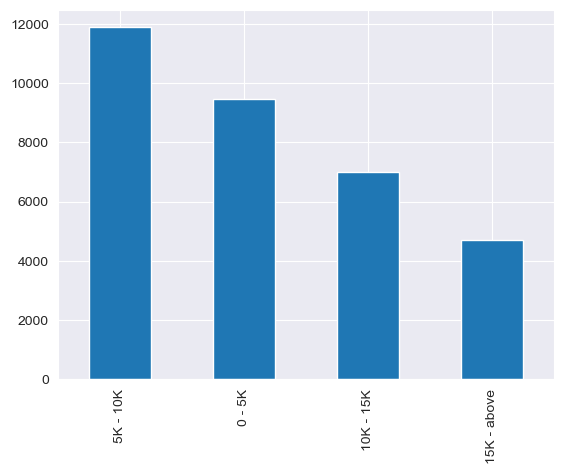

In [73]:
loan['funded_amnt_inv_b'].value_counts().plot.bar()

> Outcome: Highest loan amount applications fall in the range of 5k to 10k

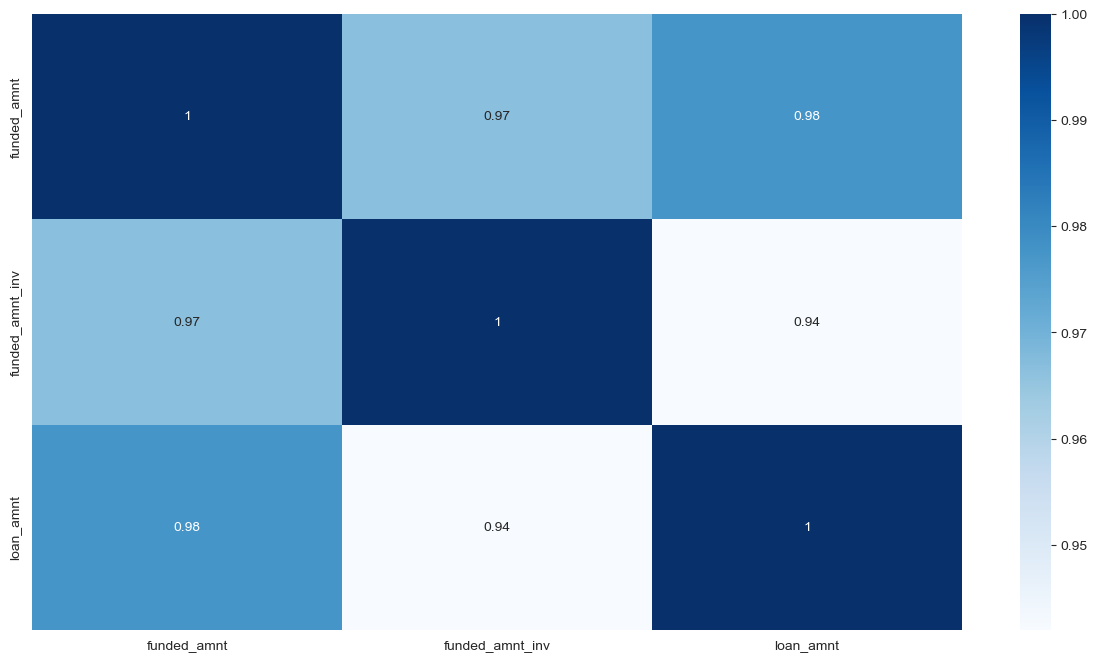

In [74]:
# Identifying key correlations
corr = loan.loc[:, [ 'funded_amnt', 'funded_amnt_inv', 'loan_amnt']].corr()
plot.figure(figsize = (15,8))
sea.heatmap(corr, annot = True, cmap='Blues')
plot.show()

> Outcome: The loan_amt, funded_amt and funded_amt_inv may is highly positively correlated. Dropping funded_amnt_inv and funded_amnt

In [75]:
# Dropping funded_amnt and funded_amnt_inv
loan = loan.drop(['funded_amnt_inv', 'funded_amnt'],  axis=1)

### annual_inc_b

<AxesSubplot:>

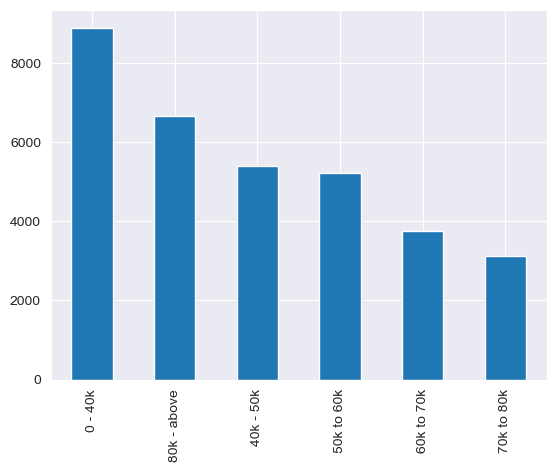

In [76]:
loan['annual_inc_b'].value_counts().plot.bar()

> Outcome: Most of the loan applocants are in the range of 0 - 40K anual income

### int_rate_b

<AxesSubplot:>

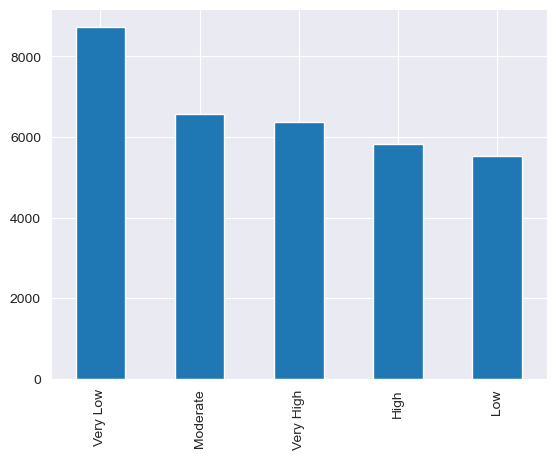

In [77]:
loan['int_rate_b'].value_counts().plot.bar()

> Outcome: Most of the loan applications are in the category of Very Low interest rate

<AxesSubplot:>

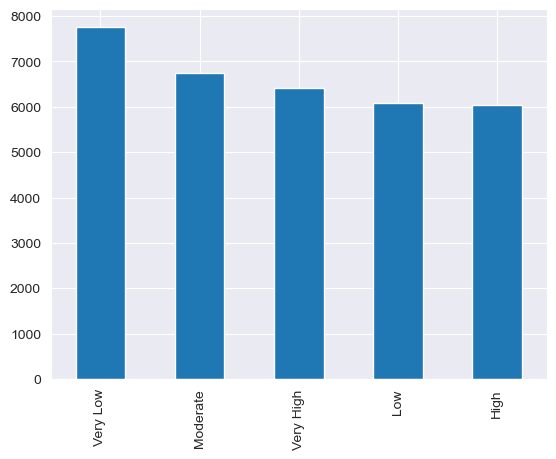

In [78]:
loan['dti_b'].value_counts().plot.bar()

> Outcome: Most of the loan applications are in Moderate debt to income ratio

# Univariate Analysis:
## Customer Demographics:
- The majority of loan applicants have an annual income between 0 to 40K.
- The majority of the debt-to-income ratio falls within 0 to 20, with some going up to 30.
- The majority of applicants are either renting or have a mortgage.
- The highest number of loan applications are for debt consolidation purposes.
- California state has the highest number of loan applications.
- Most loan applicants have no public record of bankruptcy.
- The majority of customers have been employed for 10+ years or between 0-2 years.

## Loan Demographics:
- The highest number of loan applications fall within the range of 5k to 10k.
- The majority of interest rates are between 5% to 16%, with some going up to 22%.
- Most installment amounts fall within the range of 20.
- The majority of loan applications are for a term of 36 months.
- Most loan application counts fall under the category of Grade B.

## Time-Based Analysis:
- Loan application counts are increasing each year, with the highest volume of loan applications in Quarter 4 of every year.
- The lowest loan applications are in Q1, possibly due to financial challenges, festive seasons, or debt consolidation at the end of the year.

## Inferences:
- The customer demographic data indicates which segment of customers to target for the highest volume of loans.
- Further analysis is needed to understand why other categories are not as high as a few.
- The LendingClub should be prepared for the highest volume of loans in Q4 and target customers in other quarters to increase sales.

------

# Bivariate Analysis
Includes the following analysis

- **Analysis vs Charged Off Status** - Identify causes and data which contribute to more Charge Off's
    - Annual Income Bucket (annual_inc_b)
    - Interest Rate Bucket (int_rate_b)

## Analysis vs Charged Off Status
Identify causes and data which contribute to more Charge Off's

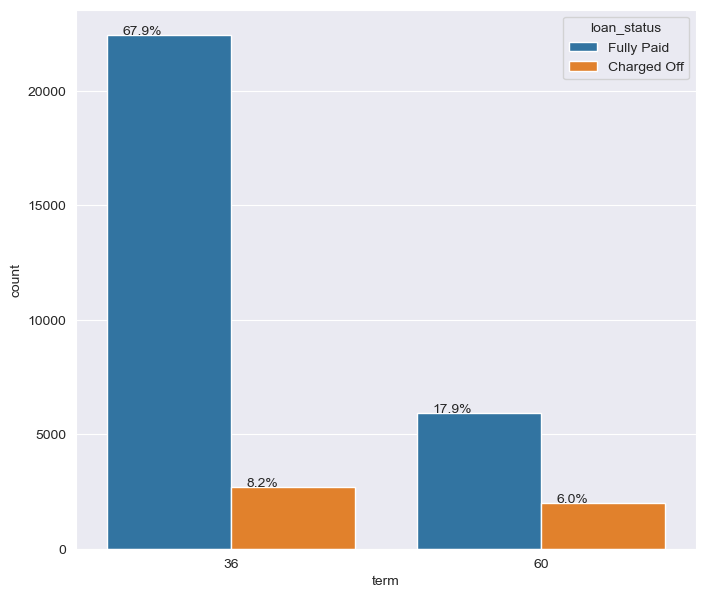

In [79]:
# Overall ratio of Charge Offs
series_plot(loan, 'term', 'loan_status')

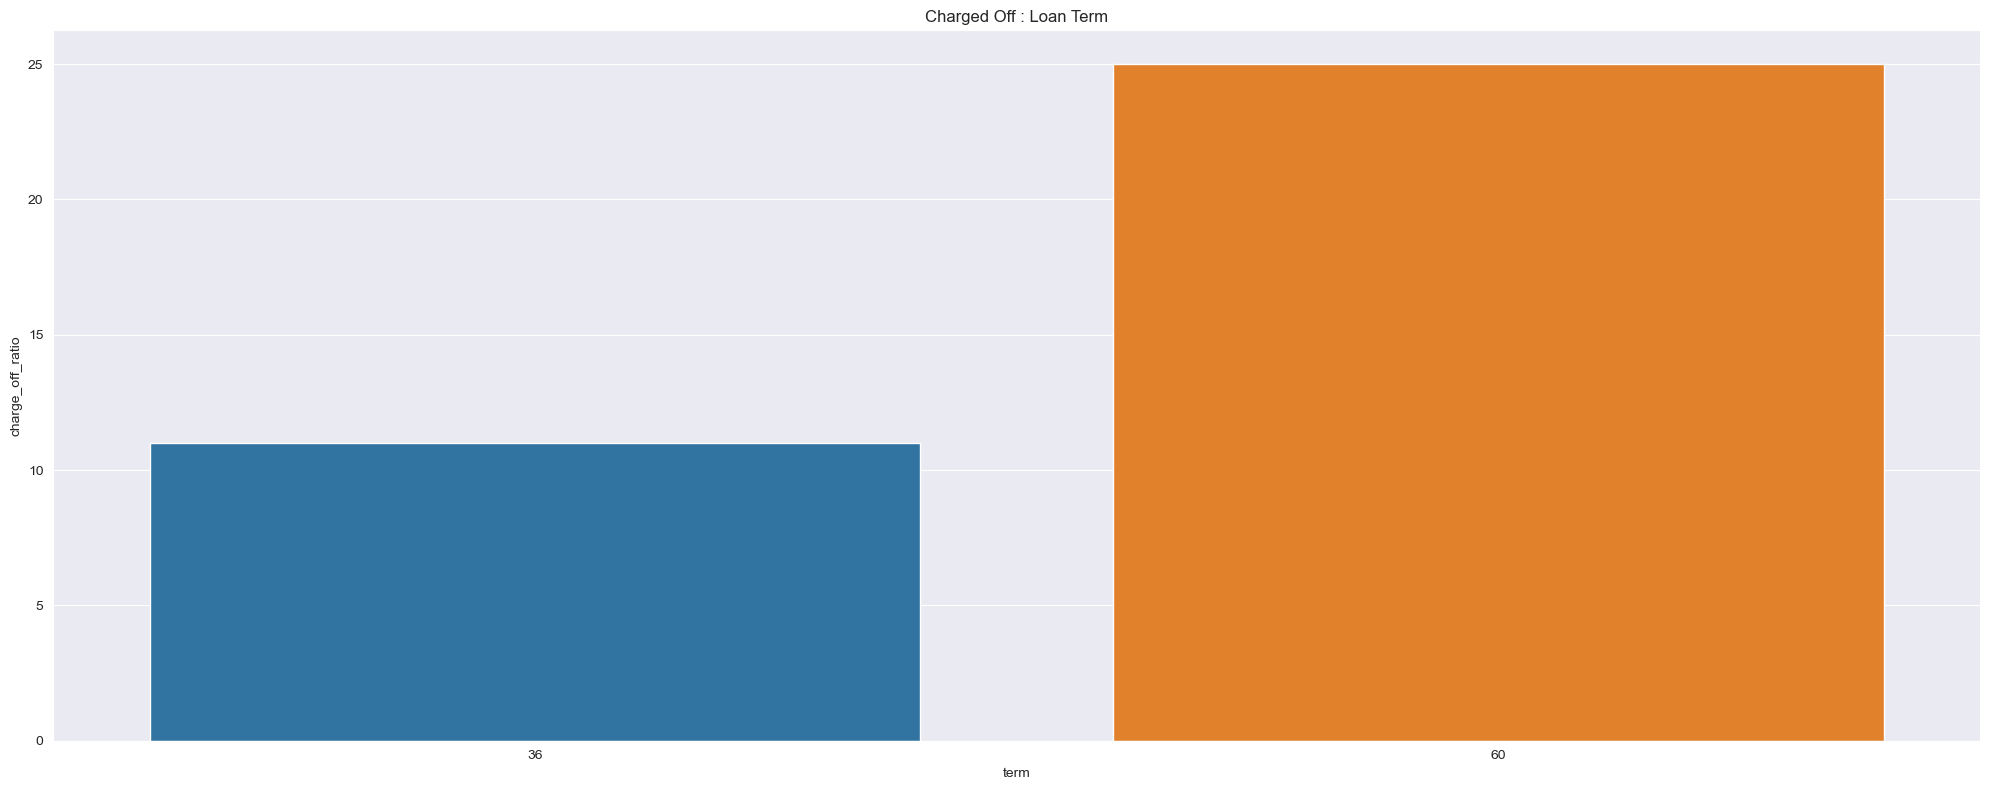

loan_status,term,Charged Off,Fully Paid,total,charge_off_ratio
0,36,2710,22429,25139,11.0
1,60,1990,5927,7917,25.0


In [80]:
## The ratio of Charge Offs within the category
ratio_wise_plot(loan, 'term')

- The majority of loans fall under the category of term = 36.
- The overall percentage of Charge Offs is slightly higher in term = 36 (8%) as compared to term=60 (6%).
- If we calculate the ratio of Charge Offs within a category:
    - The Charge Offs ratio for term=60 is 25%, which is much higher than term=36 (10%).
    - term=60 loan applications require more scrutiny.
- Inferences:
    - Most applicants with term=60 potentially have high Charge Offs.

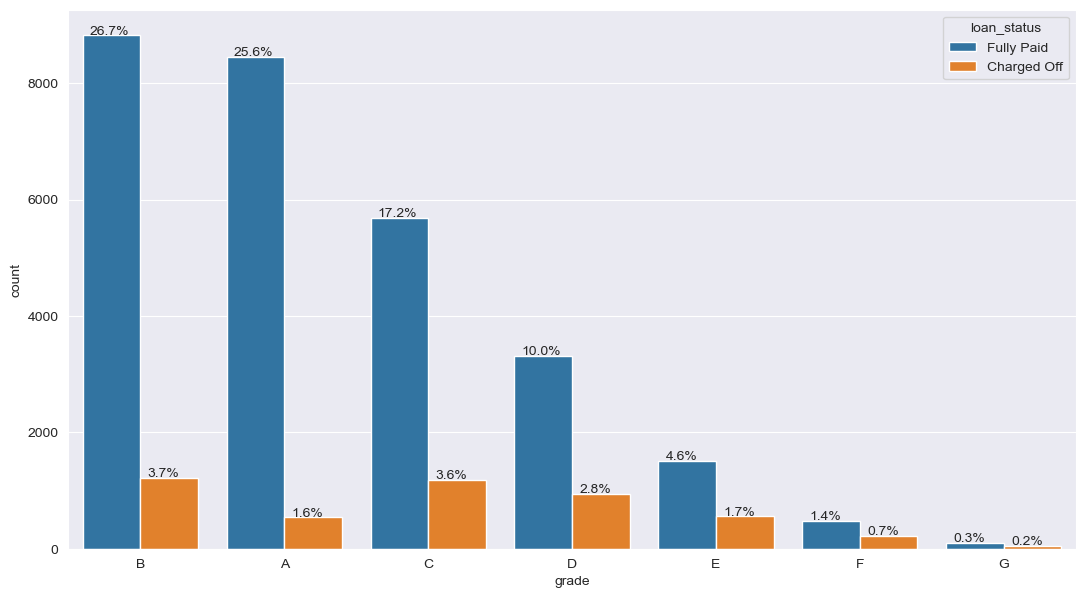

In [81]:
# Overall ratio of Charge Offs against the total
series_plot(loan, 'grade', 'loan_status')

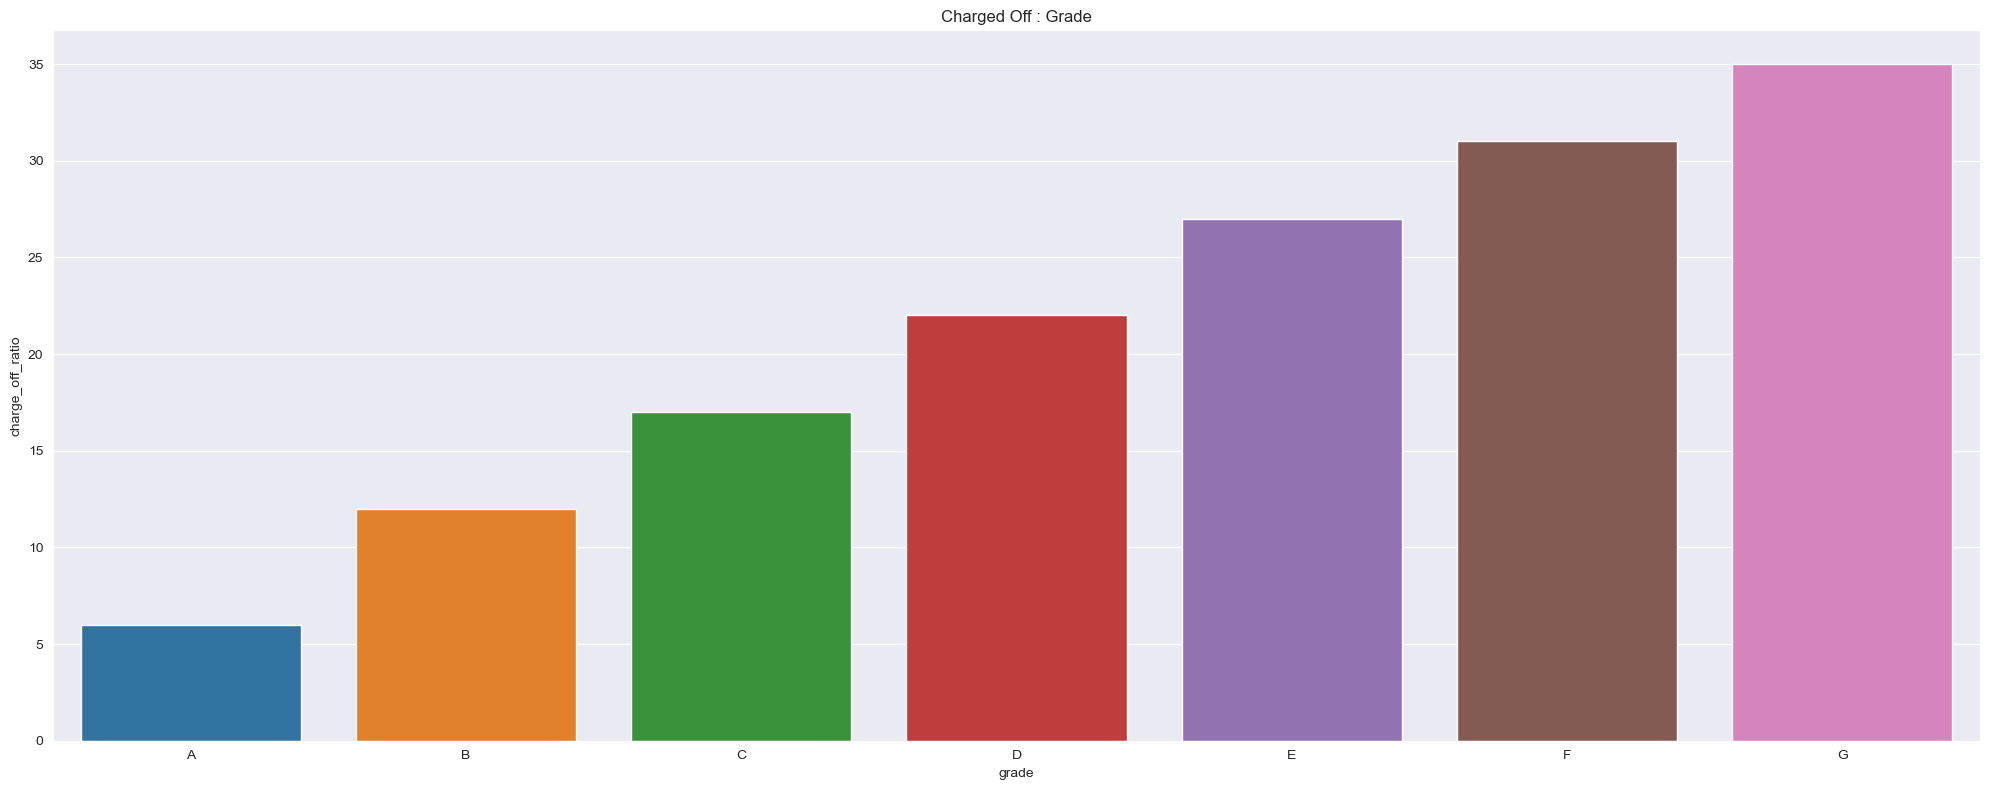

loan_status,grade,Charged Off,Fully Paid,total,charge_off_ratio
0,A,537,8451,8988,6.0
1,B,1222,8821,10043,12.0
2,C,1175,5683,6858,17.0
3,D,937,3316,4253,22.0
4,E,555,1505,2060,27.0
5,F,219,477,696,31.0
6,G,55,103,158,35.0


In [82]:
## The ratio of Charge Offs within the category total
ratio_wise_plot(loan, 'grade')

## Outcome
- The majority of loan volume falls under the Grade B category.
- The highest percentage of overall Charge Offs are in Grade B (3.7%) and C (3.6%).
- When analyzing the Charge Off Ratio within a category, the highest percentage of Charge Offs are in the Grade G.
- The highest cluster of Charge Offs are in the Grades G and F (> 30%).
- Although the volume of Grade G is extremely low (158), it does not contribute significantly to overall risk.

## Inferences:
- The highest risk of Charge Offs is in the Grades B and C.
- Grades F and G have a very high chance of being charged off, but the volumes are low.
- Grade A has a very low chance of being charged off.
- The probability of being charged off increases from Grade A to Grade G.

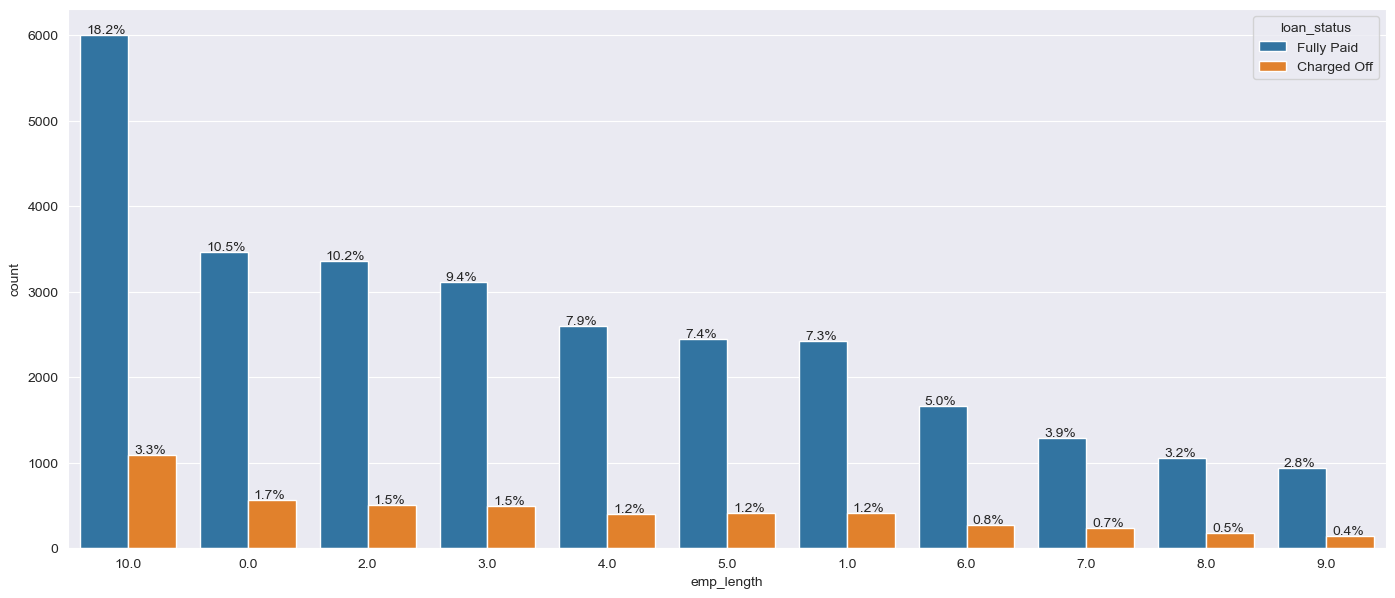

In [83]:
# Overall ratio of Charge Offs against the total
series_plot(loan, 'emp_length', 'loan_status')

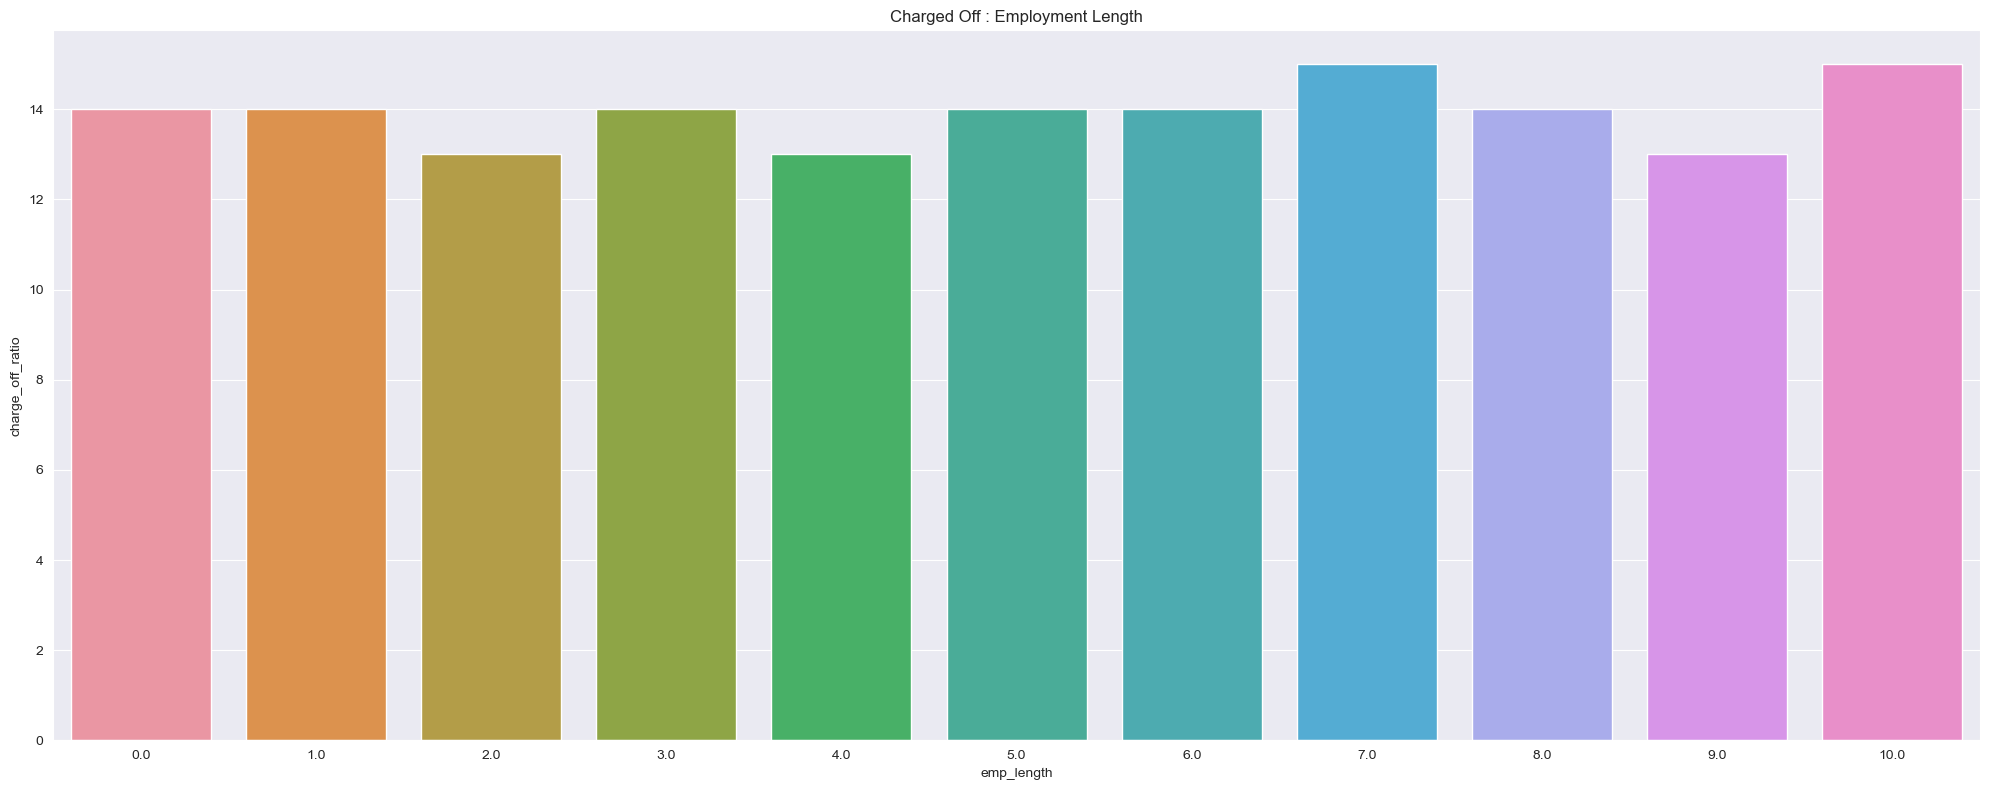

loan_status,emp_length,Charged Off,Fully Paid,total,charge_off_ratio
0,0.0,565,3461,4026,14.0
1,1.0,408,2427,2835,14.0
2,2.0,509,3360,3869,13.0
3,3.0,491,3113,3604,14.0
4,4.0,401,2598,2999,13.0
5,5.0,408,2449,2857,14.0
6,6.0,272,1659,1931,14.0
7,7.0,233,1294,1527,15.0
8,8.0,176,1056,1232,14.0
9,9.0,141,936,1077,13.0


In [84]:
## The ratio of Charge Offs within the category total
ratio_wise_plot(loan, 'emp_length')

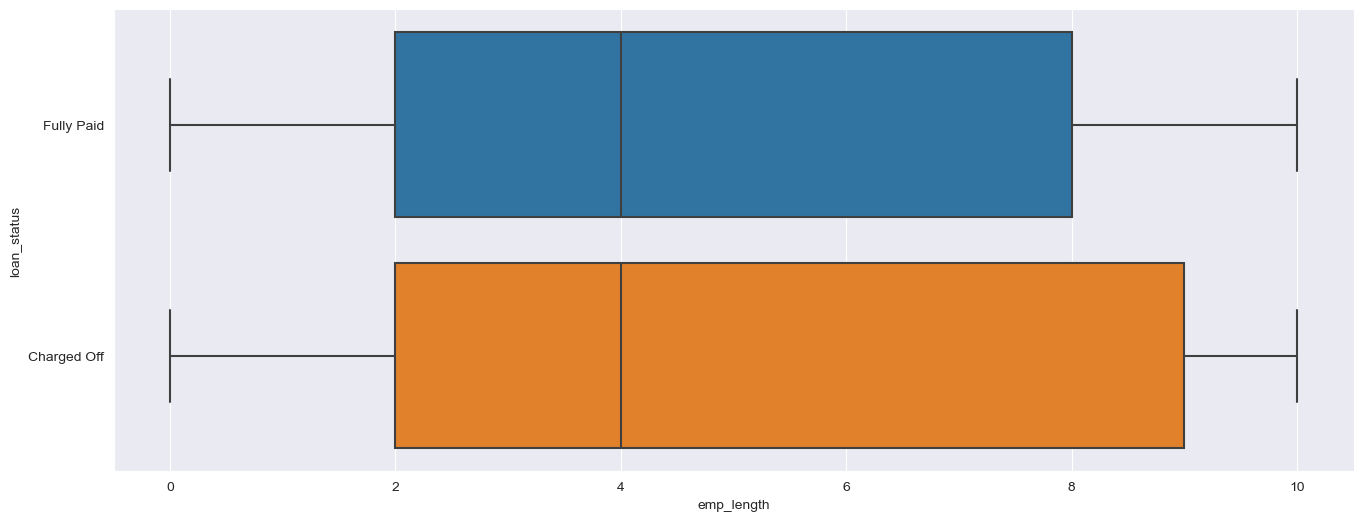

In [85]:
plot.figure(figsize=(16,6))
sea.boxplot(y=loan.loan_status,x=loan.emp_length)
plot.show()

------
## Outcome
- The highest Charge Offs are in the employee length category of 10 years and above.
- The Charge Off ratio within the categories themselves is similar and inconclusive.

## Inferences:
- The highest Charge Offs are in the employee length of 10 years and above.
- There is a high probability of Charge Offs for those whose income range is less than 1 year.
- The ratio within the income ranges is pretty much the same and inconclusive.

----

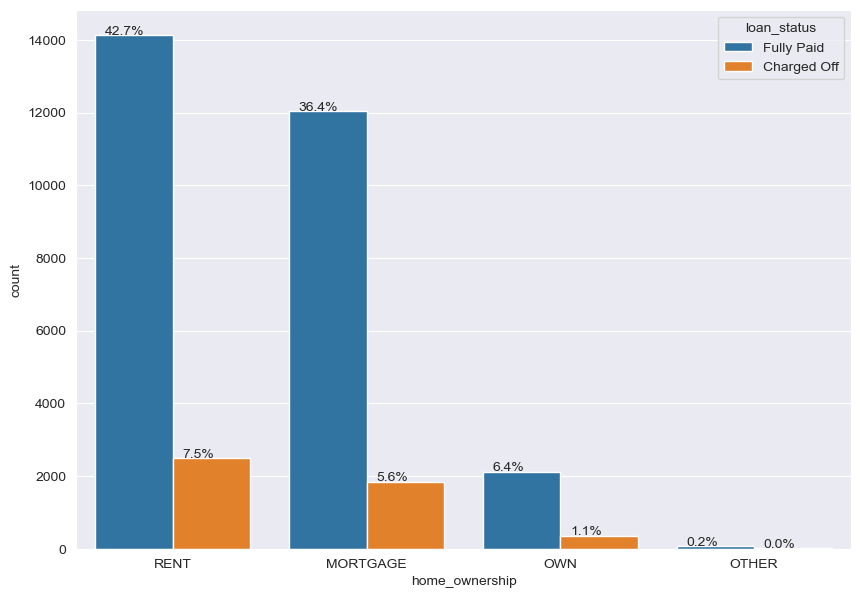

In [87]:
# Overall ratio of Charge Offs against the total
series_plot(loan, 'home_ownership', 'loan_status')

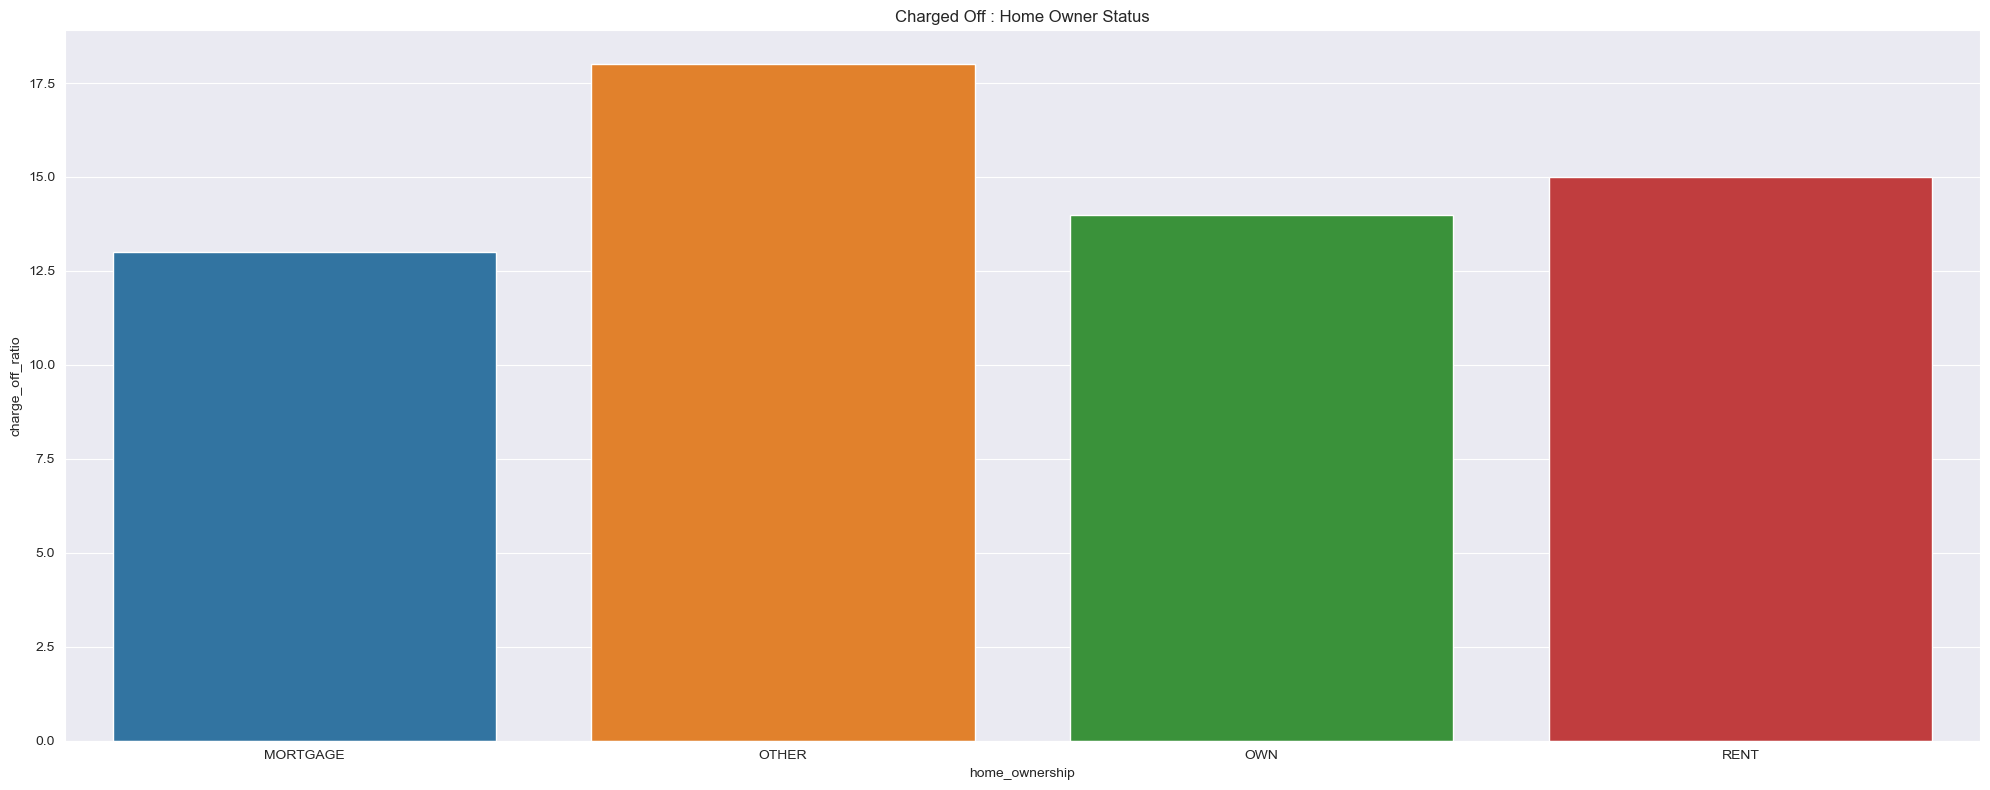

loan_status,home_ownership,Charged Off,Fully Paid,total,charge_off_ratio
0,MORTGAGE,1846,12045,13891,13.0
1,OTHER,16,73,89,18.0
2,OWN,354,2113,2467,14.0
3,RENT,2484,14125,16609,15.0


In [88]:
## The ratio of Charge Offs within the category total
ratio_wise_plot(loan, 'home_ownership')

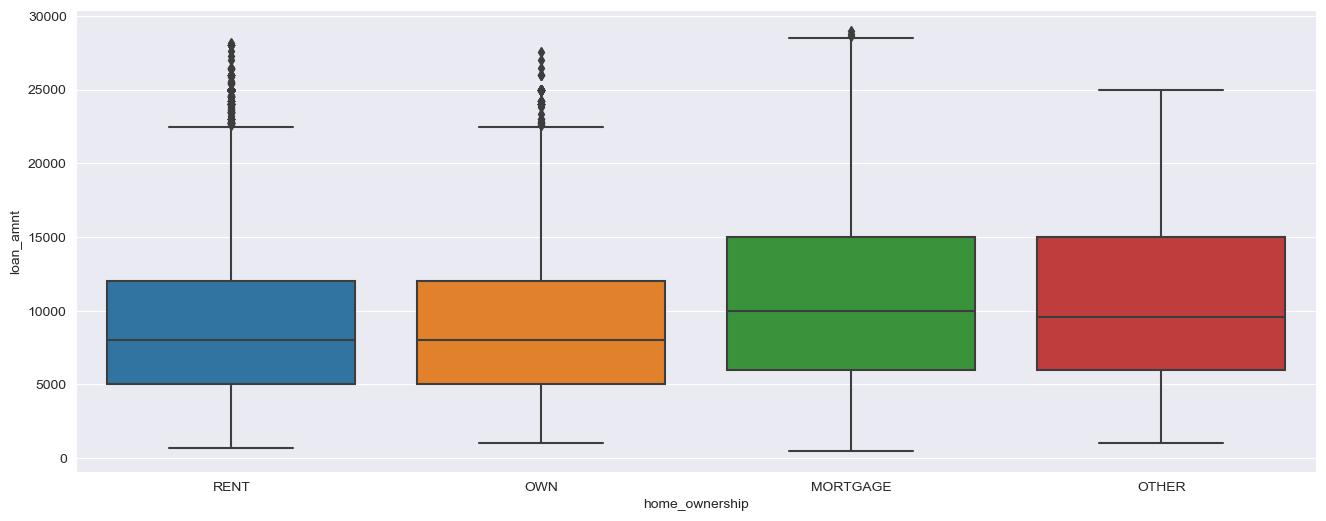

In [89]:
plot.figure(figsize=(16,6))
sea.boxplot(y=loan.loan_amnt,x=loan.home_ownership)
plot.show()

## Outcome
The overall highest Charge Off numbers are in the RENT and MORTGAGE categories. Within each home_ownership category, the ratio of Charge Offs for Other is higher.

## Inferences:
The home_ownership status of RENT and MORTGAGE are at the highest risk of Charge Offs. The MORTGAGE status also has the highest range of loan amounts, which increases the risk.

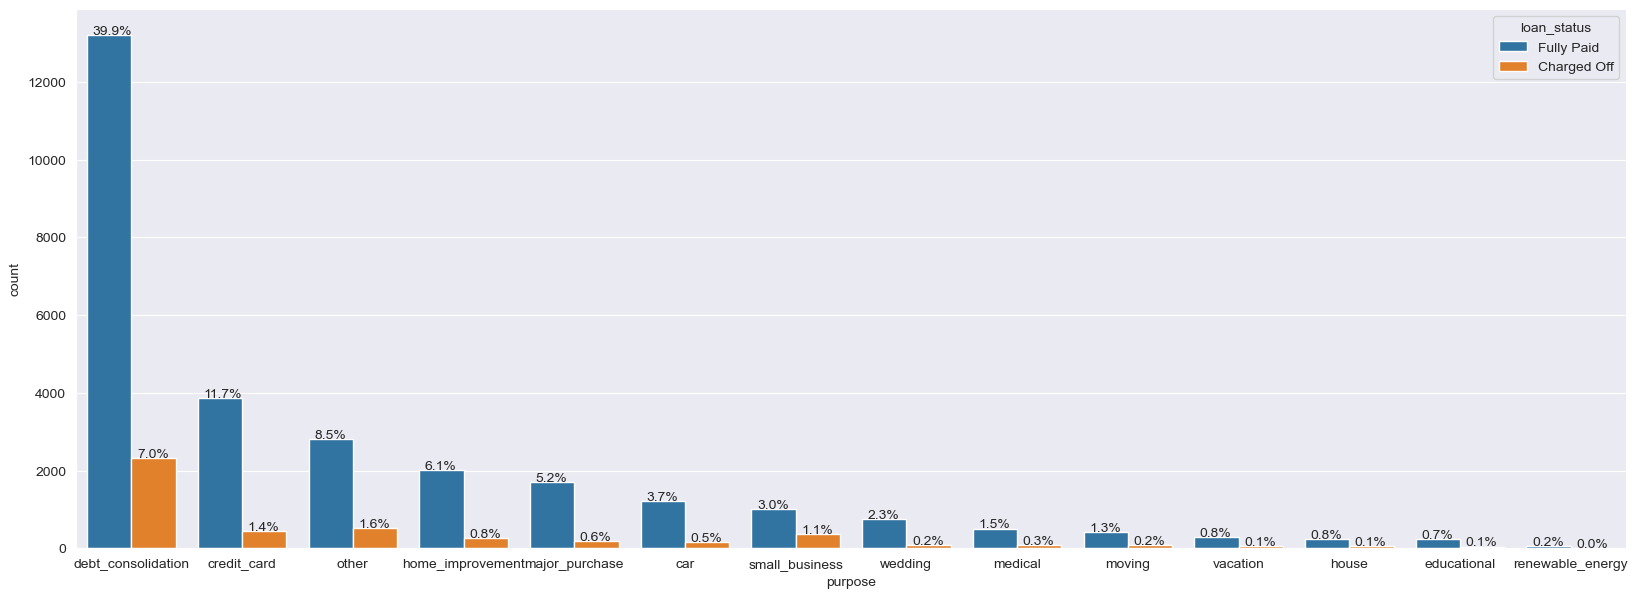

In [90]:
# Overall ratio of Charge Offs against the total
series_plot(loan, 'purpose', 'loan_status')

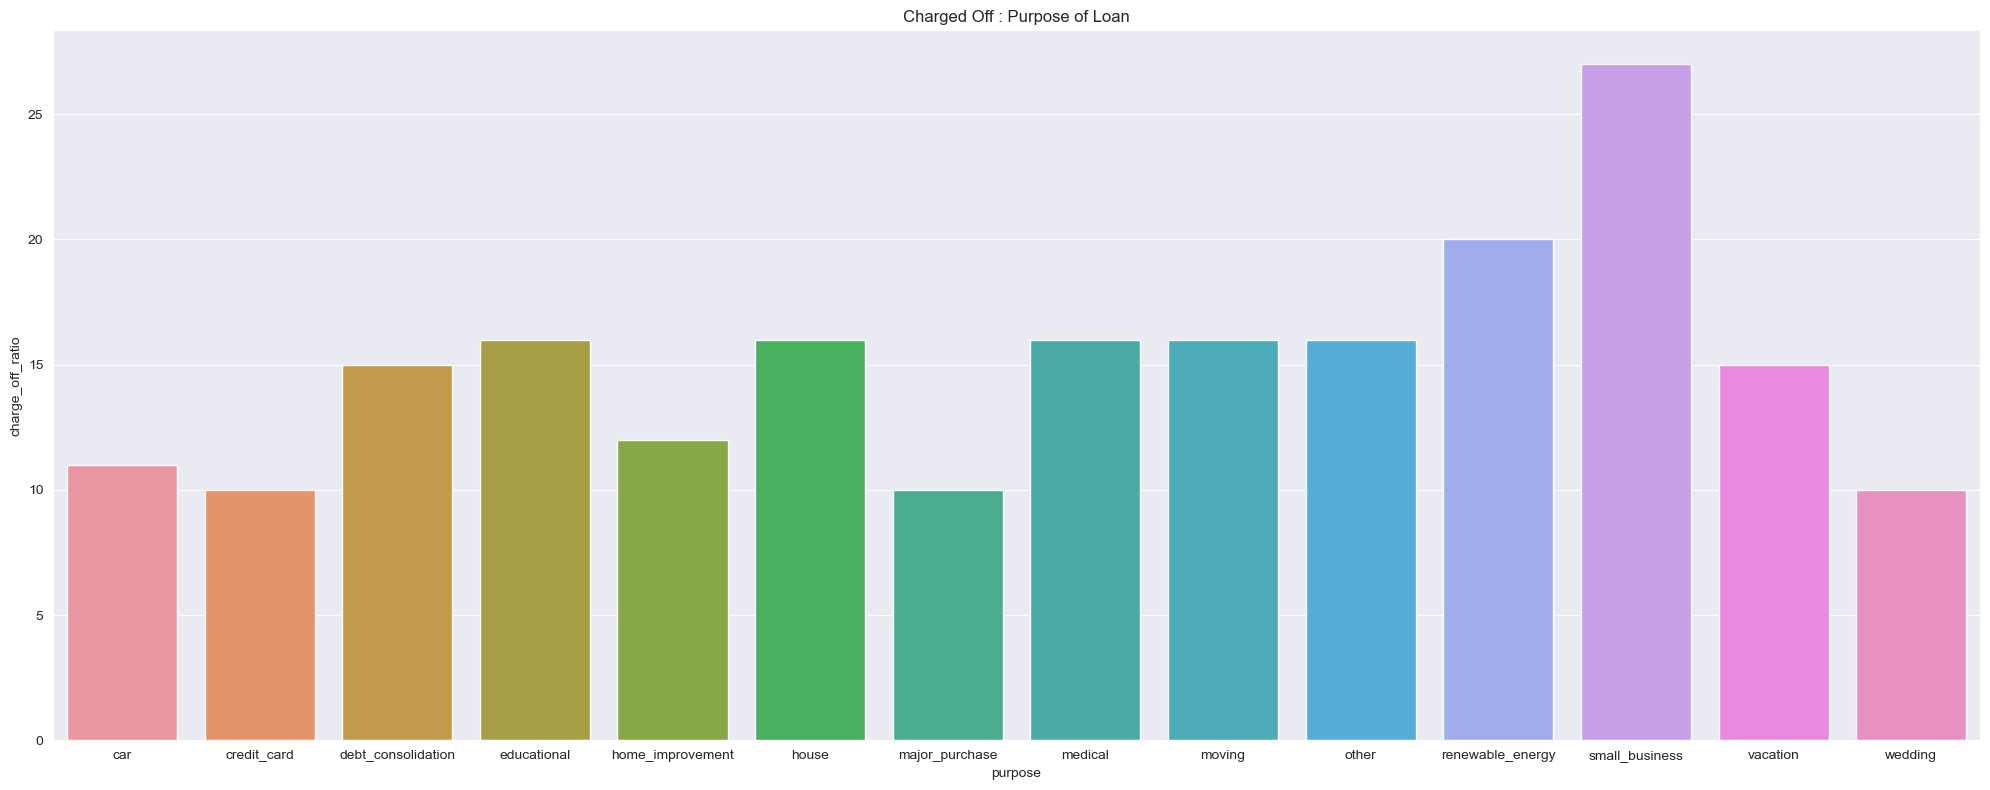

loan_status,purpose,Charged Off,Fully Paid,total,charge_off_ratio
0,car,150,1221,1371,11.0
1,credit_card,448,3868,4316,10.0
2,debt_consolidation,2325,13203,15528,15.0
3,educational,46,235,281,16.0
4,home_improvement,274,2014,2288,12.0
5,house,48,248,296,16.0
6,major_purchase,194,1710,1904,10.0
7,medical,95,509,604,16.0
8,moving,79,428,507,16.0
9,other,531,2818,3349,16.0


In [91]:
## The ratio of Charge Offs within the category total
ratio_wise_plot(loan, 'purpose')

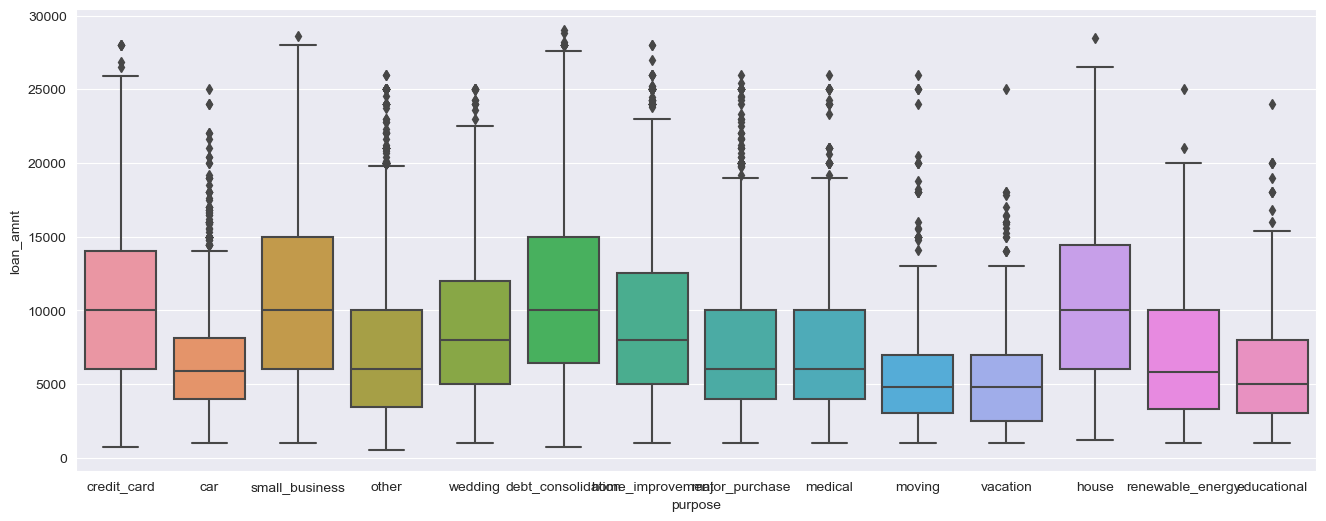

In [92]:
plot.figure(figsize=(16,6))
sea.boxplot(y=loan.loan_amnt,x=loan.purpose)
plot.show()

## Outcome
The highest risk of Charge Offs is in the debt_consolidation category. The highest probability of Charge Offs within a category is in the small_business category, but the volume is extremely low. The highest loan amount ranges are in the small business, debt consolidation, and house categories.

## Inferences:
The purpose of debt_consolidation has the highest risk of Charge Offs. Small Business applicants have a high chance of getting charged off. The renewable_energy category has the lowest risk of Charge Offs in volume.

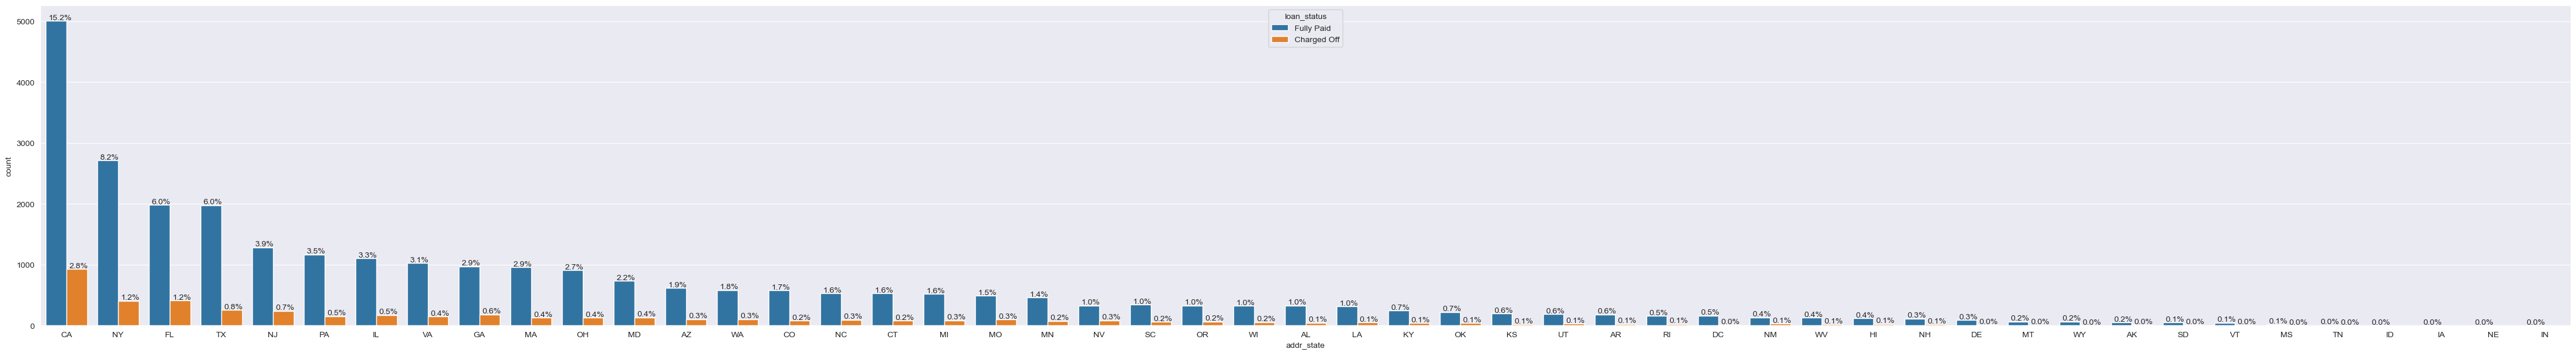

In [94]:
# Overall ratio of Charge Offs against the total
series_plot(loan, 'addr_state', 'loan_status')

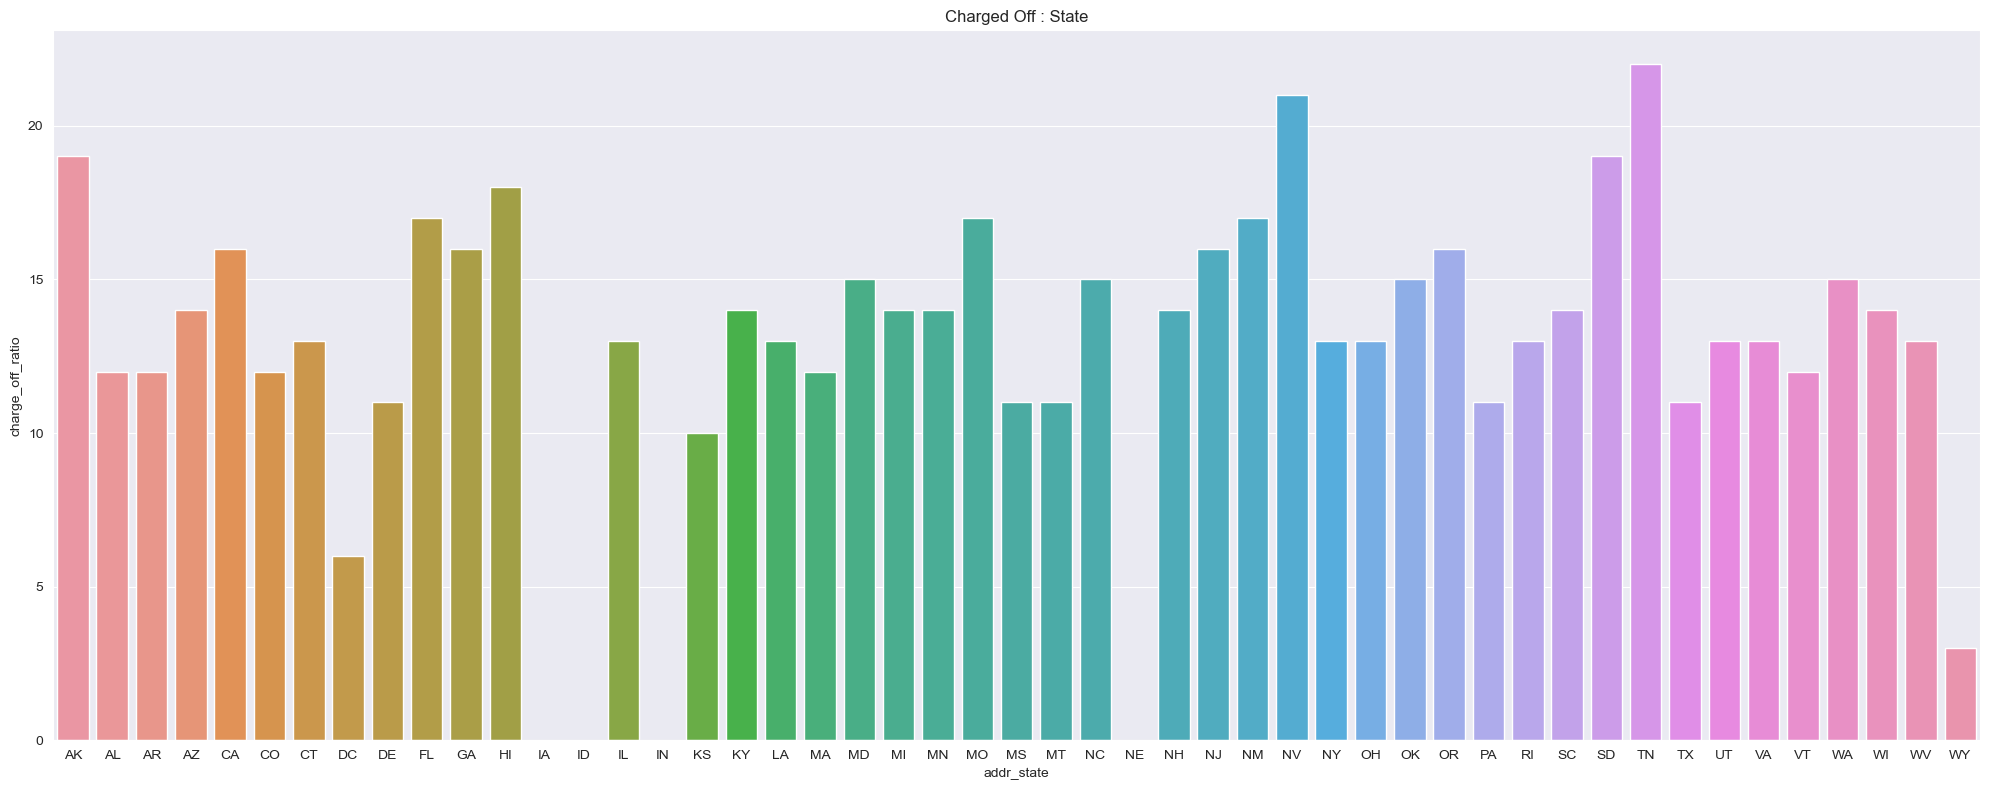

loan_status,addr_state,Charged Off,Fully Paid,total,charge_off_ratio
0,AK,12.0,51.0,63.0,19.0
1,AL,45.0,330.0,375.0,12.0
2,AR,25.0,183.0,208.0,12.0
3,AZ,103.0,618.0,721.0,14.0
4,CA,930.0,5009.0,5939.0,16.0
5,CO,77.0,576.0,653.0,12.0
6,CT,80.0,526.0,606.0,13.0
7,DC,10.0,162.0,172.0,6.0
8,DE,11.0,90.0,101.0,11.0
9,FL,413.0,1984.0,2397.0,17.0


In [95]:
## The ratio of Charge Offs within the category total
ratio_wise_plot(loan, 'addr_state')

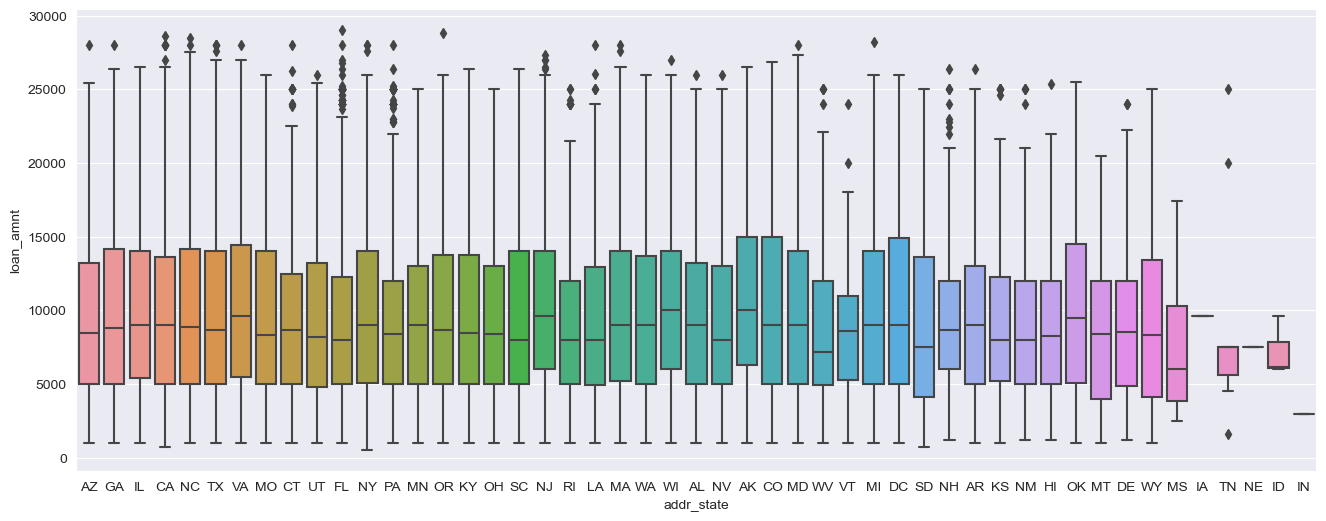

In [96]:
plot.figure(figsize=(16,6))
sea.boxplot(y=loan.loan_amnt,x=loan.addr_state)
plot.show()

##  Outcome
- The state with the highest volume of loans is CA and, based purely on volume.
- The highest number of Charge Offs also come from CA.
- Within each state, NE and NV have the highest number of Charge Offs.
- However, NE has a very low volume, so it cannot be considered.
- Loan applications from NV will have a high risk of Charge Offs.

## Inferences:
- Loan applications from NV (Nevada) have a high risk of Charge Offs.
- NE has a very high probability of Charge Offs, but the volume is too low to be significant.
- NV, CA, and FL have a high percentage of Charge Offs.

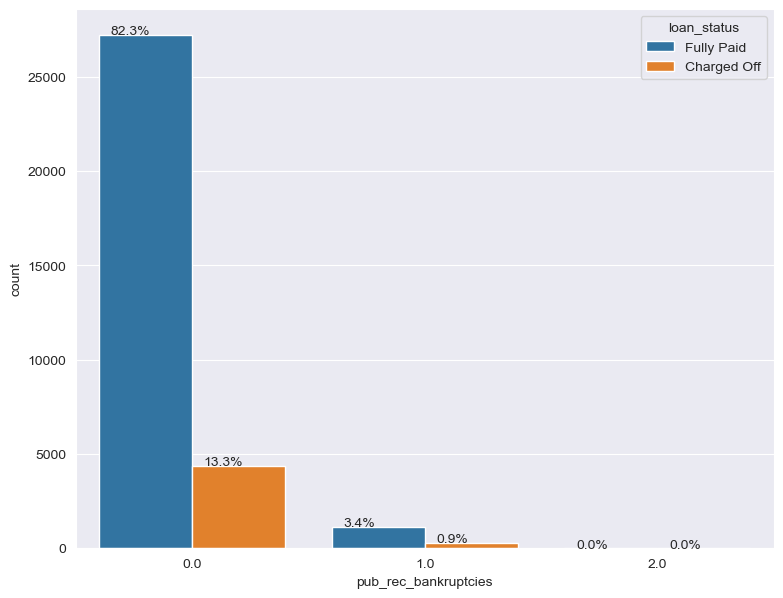

In [97]:
# Overall ratio of Charge Offs against the total
series_plot(loan, 'pub_rec_bankruptcies', 'loan_status')

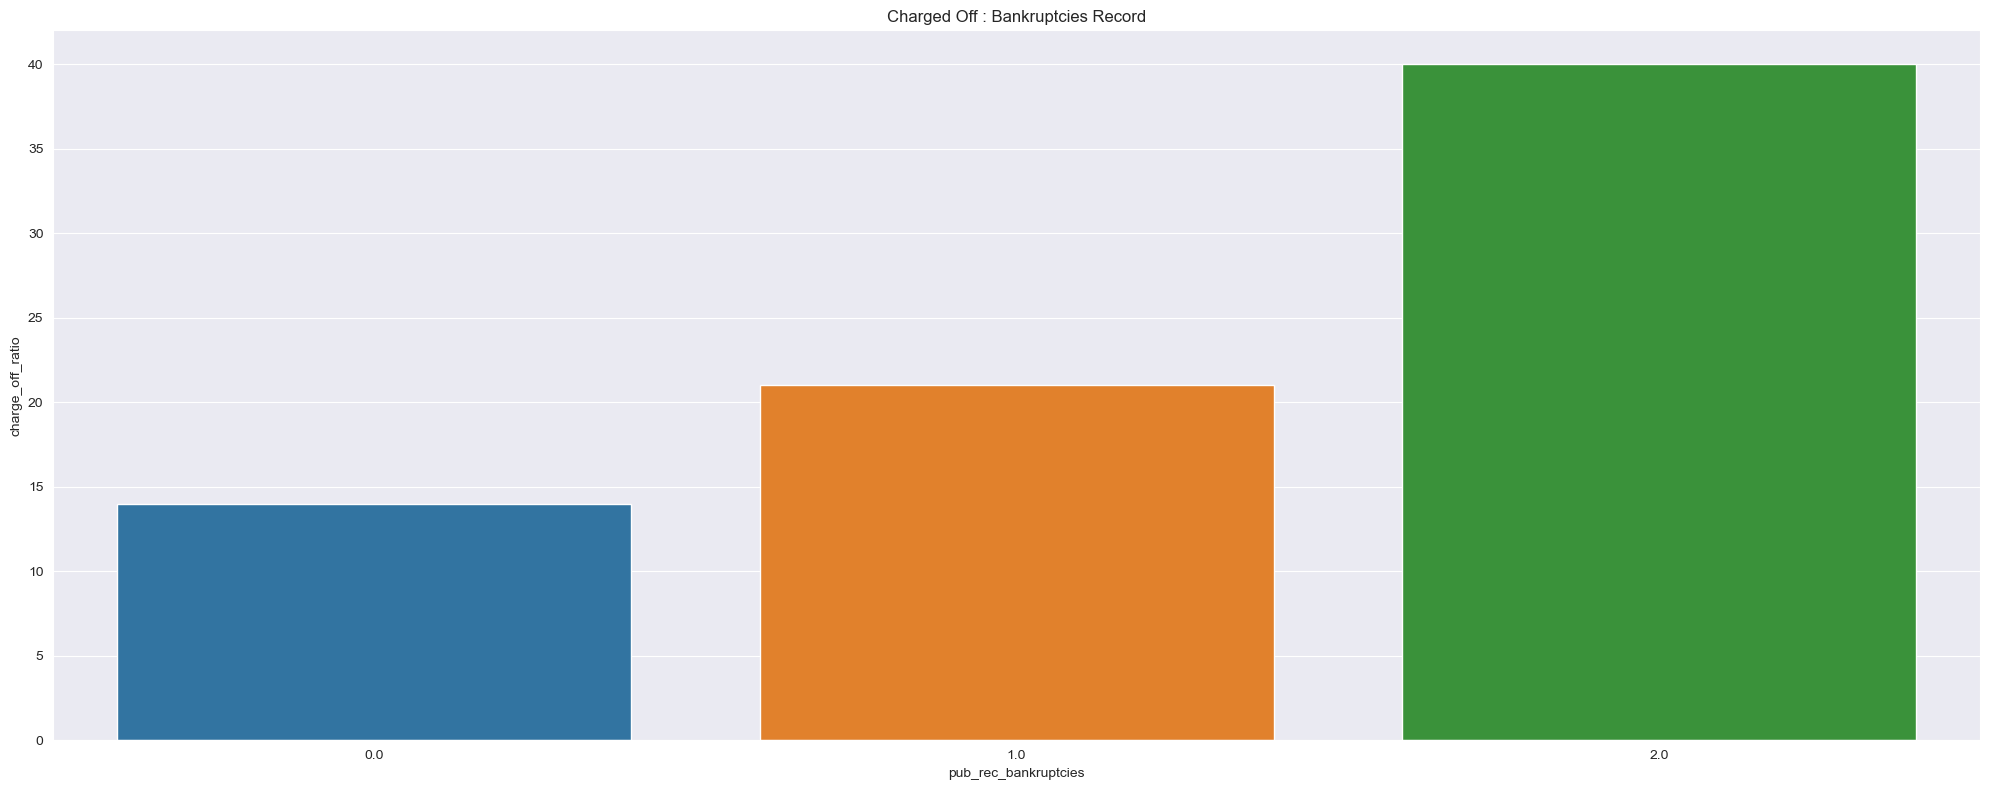

loan_status,pub_rec_bankruptcies,Charged Off,Fully Paid,total,charge_off_ratio
0,0.0,4390,27216,31606,14.0
1,1.0,308,1137,1445,21.0
2,2.0,2,3,5,40.0


In [98]:
## The ratio of Charge Offs within the category total
ratio_wise_plot(loan, 'pub_rec_bankruptcies')

## Outcome
- Purely based on volumes the number of charge_offs are in the category of 0 (no bankruptcy record)
- Looking at ratios within each category, customers having bankruptcy record has high charge_off ratio
## Inferences
- Customers having bankruptcy record are at high risk of Charge Offs
- pub_rec_bankruptcies count 2 has even higher Charge Off ratio

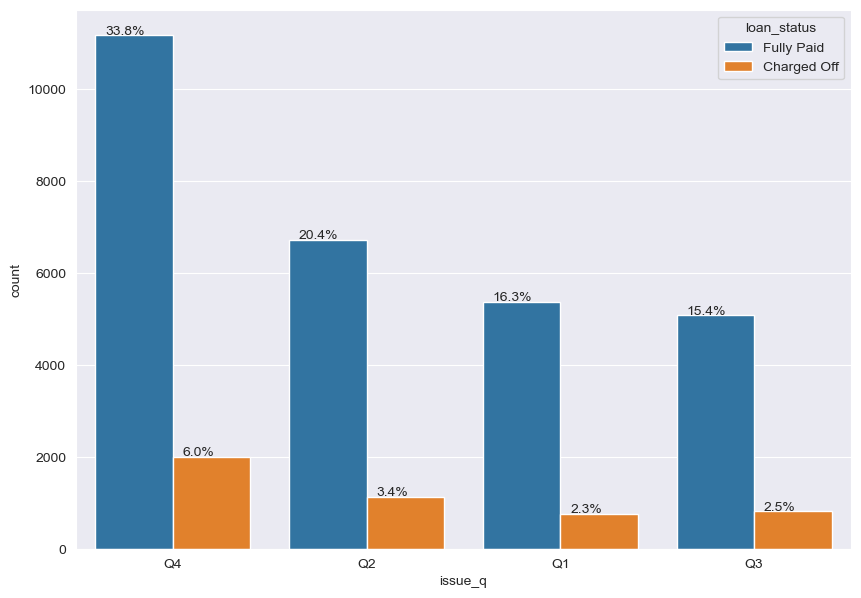

In [99]:
# Overall ratio of Charge Offs against the total
series_plot(loan, 'issue_q', 'loan_status')

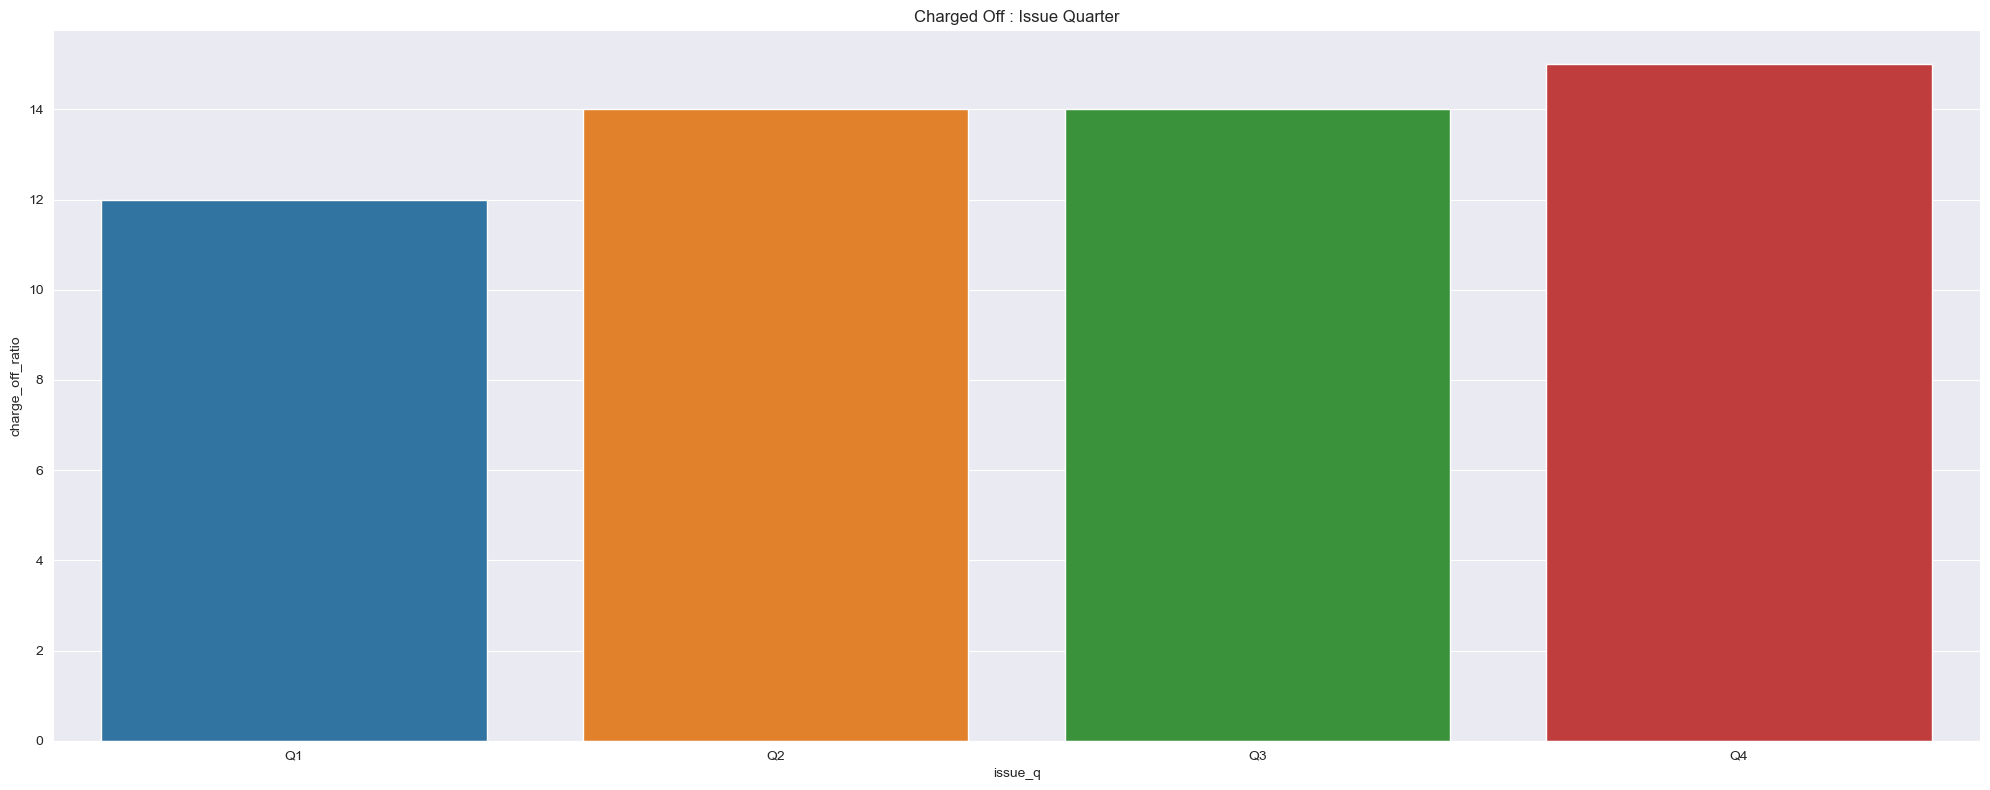

loan_status,issue_q,Charged Off,Fully Paid,total,charge_off_ratio
0,Q1,761,5376,6137,12.0
1,Q2,1124,6728,7852,14.0
2,Q3,818,5078,5896,14.0
3,Q4,1997,11174,13171,15.0


In [100]:
## The ratio of Charge Offs within the category total
ratio_wise_plot(loan, 'issue_q')

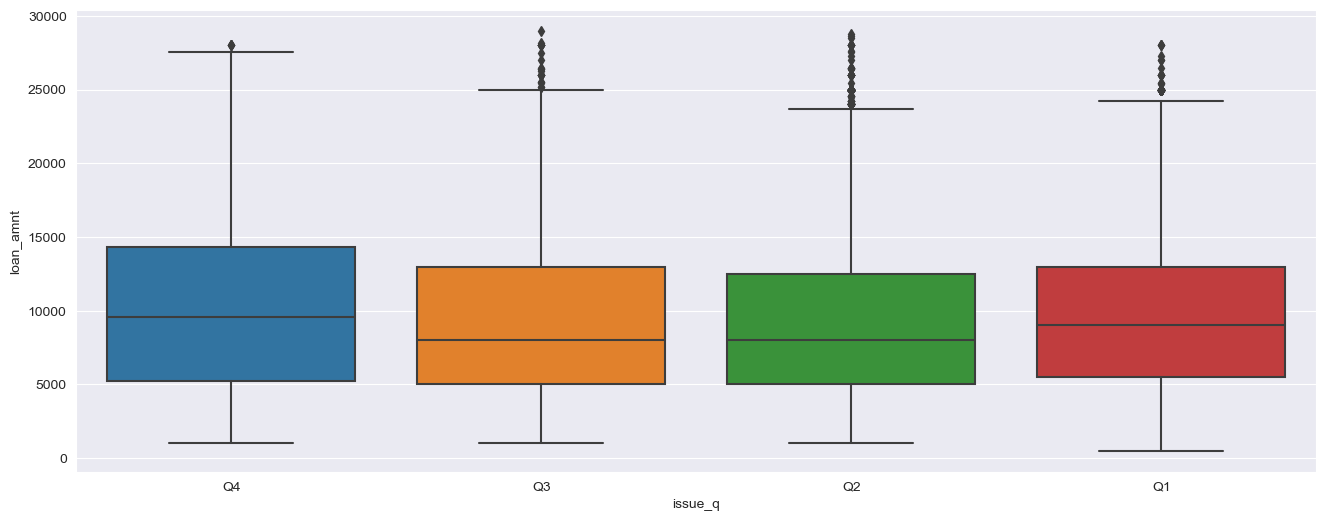

In [101]:
plot.figure(figsize=(16,6))
sea.boxplot(y=loan.loan_amnt,x=loan.issue_q)
plot.show()

Outcome:
- Quarter 4 has the highest ratio of Charge Offs
- Year has no significant impact as apart from volume increasing year over year, which is impacting charge offs
2007 has the maximum Charge Offs.
- Any current loan running, which started in 2007 may have risk
## Inferences
- Q4 of the year has the highest Charge Off's
- Charge Off's will increase year over year as the loan volume increases

## Annual Income Bucket (annual_inc_b)

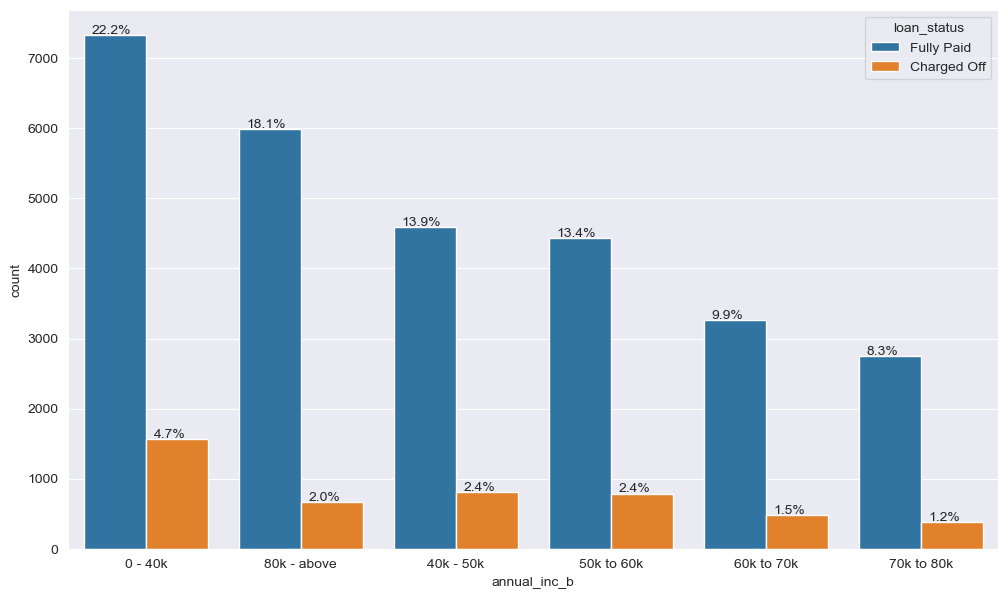

In [102]:
# Overall ratio of Charge Offs against the total
series_plot(loan, 'annual_inc_b', 'loan_status')

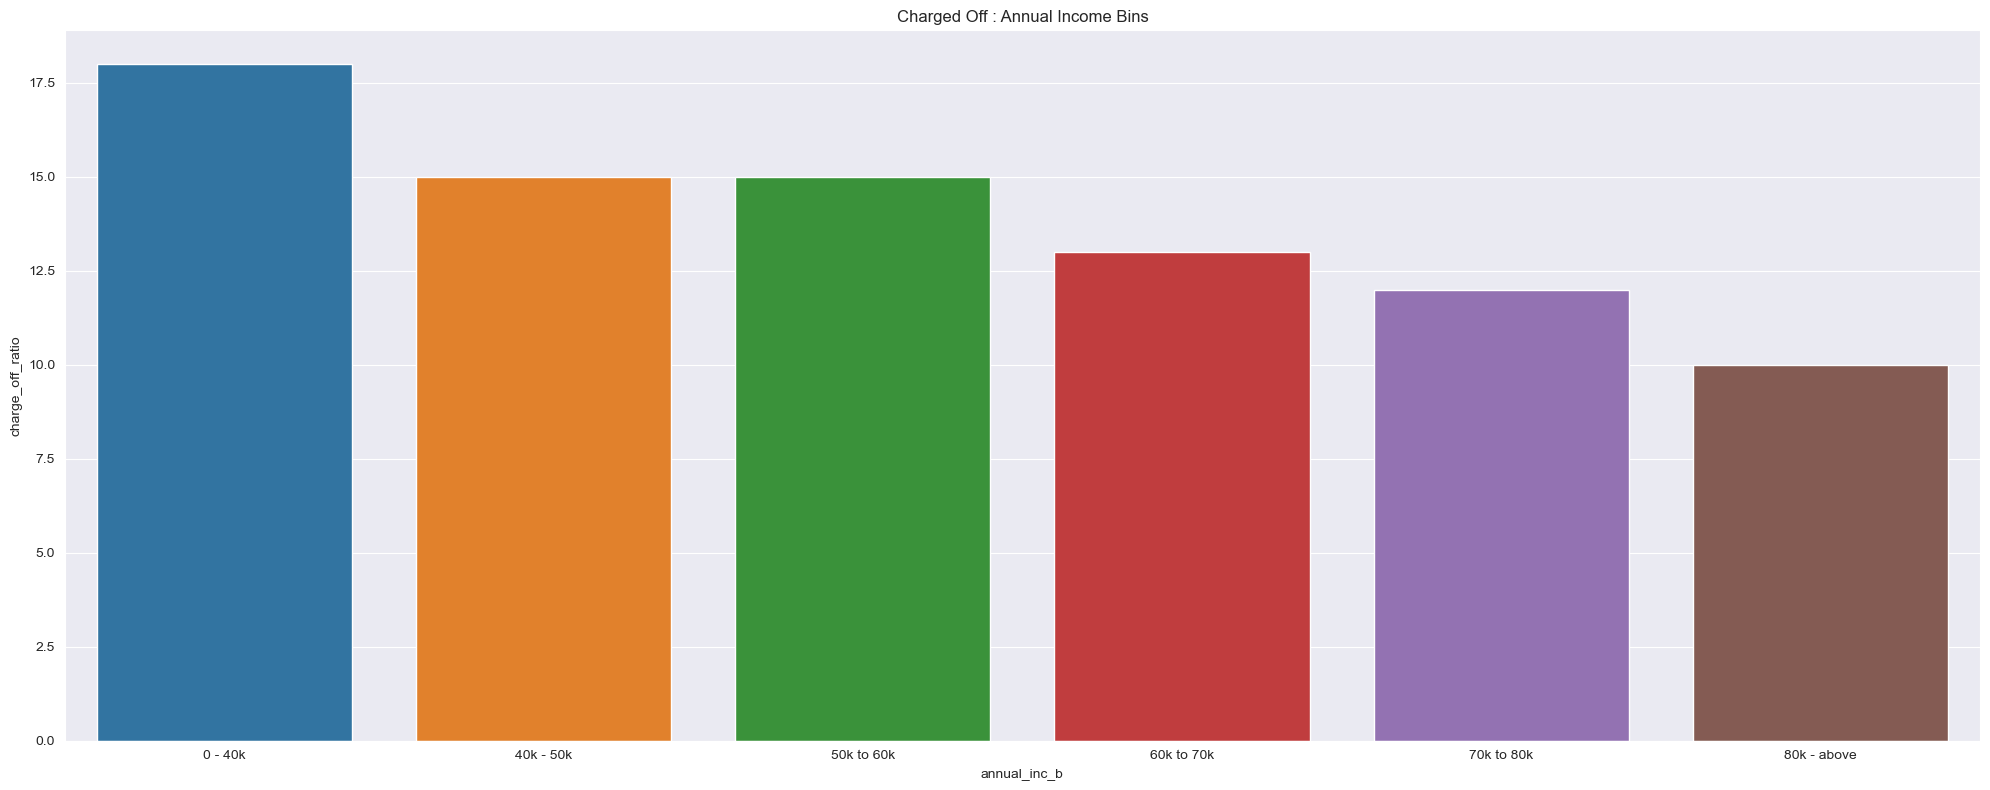

loan_status,annual_inc_b,Charged Off,Fully Paid,total,charge_off_ratio
0,0 - 40k,1570,7326,8896,18.0
1,40k - 50k,807,4593,5400,15.0
2,50k to 60k,788,4435,5223,15.0
3,60k to 70k,486,3261,3747,13.0
4,70k to 80k,385,2749,3134,12.0
5,80k - above,664,5992,6656,10.0


In [103]:
## The ratio of Charge Offs within the category total
ratio_wise_plot(loan, 'annual_inc_b')

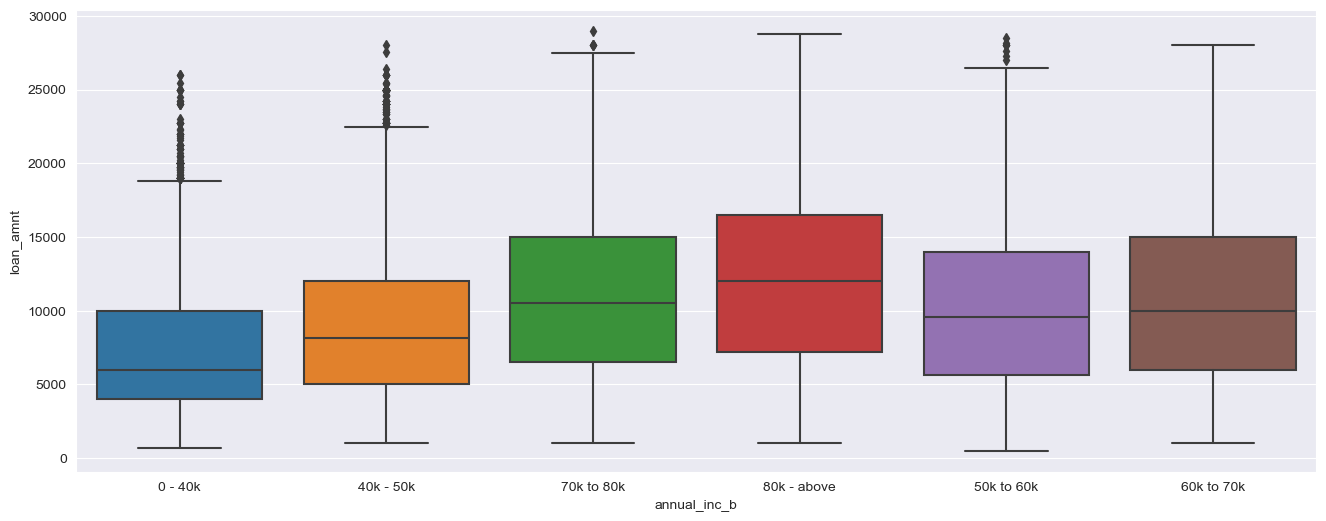

In [104]:
plot.figure(figsize=(16,6))
sea.boxplot(y=loan.loan_amnt,x=loan.annual_inc_b)
plot.show()

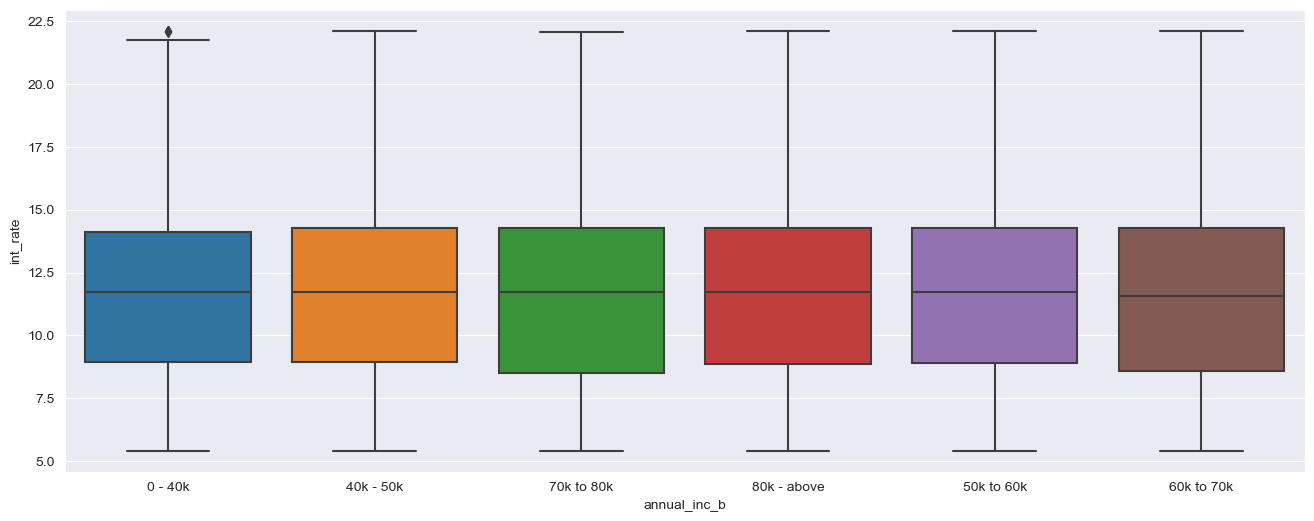

In [105]:
plot.figure(figsize=(16,6))
sea.boxplot(y=loan.int_rate,x=loan.annual_inc_b)
plot.show()

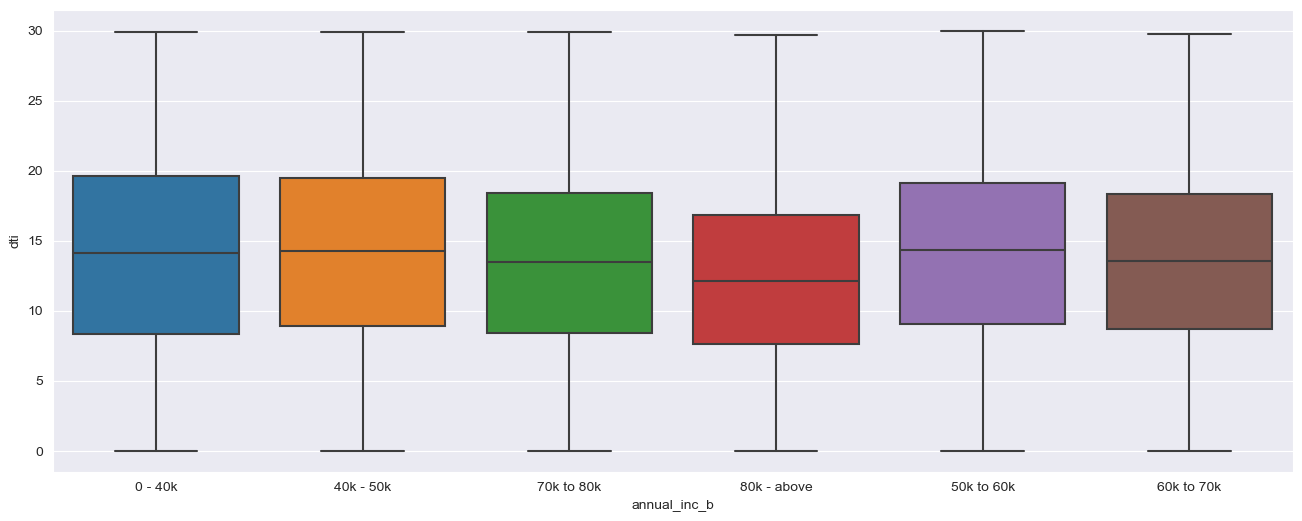

In [106]:
plot.figure(figsize=(16,6))
sea.boxplot(y=loan.dti,x=loan.annual_inc_b)
plot.show()

## Outcome
- Annual income range of 0-40K has the highest charge offs
- Charge off ratio within the bucket of 0-40K have highest Charge Offs
## Inferences
- Income range of 0-40K have the highest risk
- Income range 80000+ has less chances of charged off.
- Increase in annual income charged off proportion decreases.

## Loan Amount Bucket (loan_amnt_b)

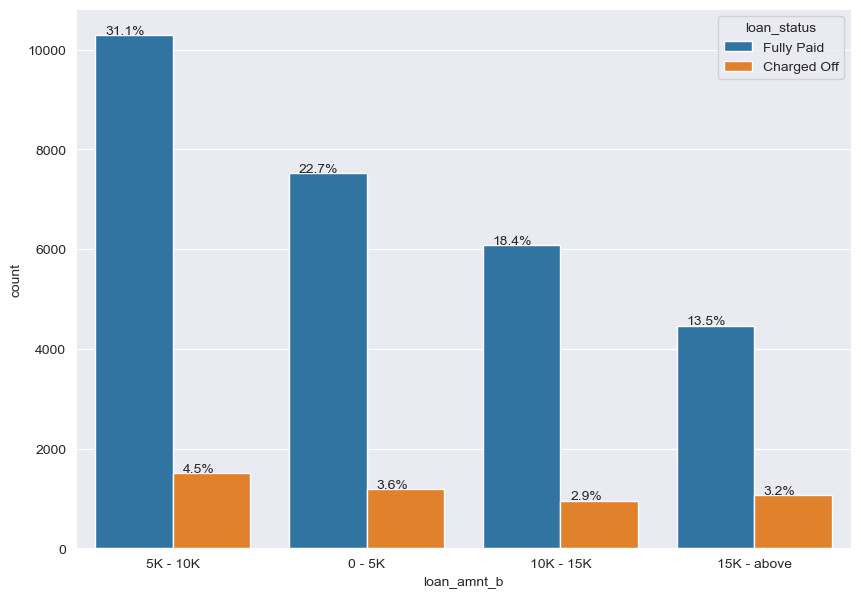

In [108]:
# Overall ratio of Charge Offs against the total
series_plot(loan, 'loan_amnt_b', 'loan_status')

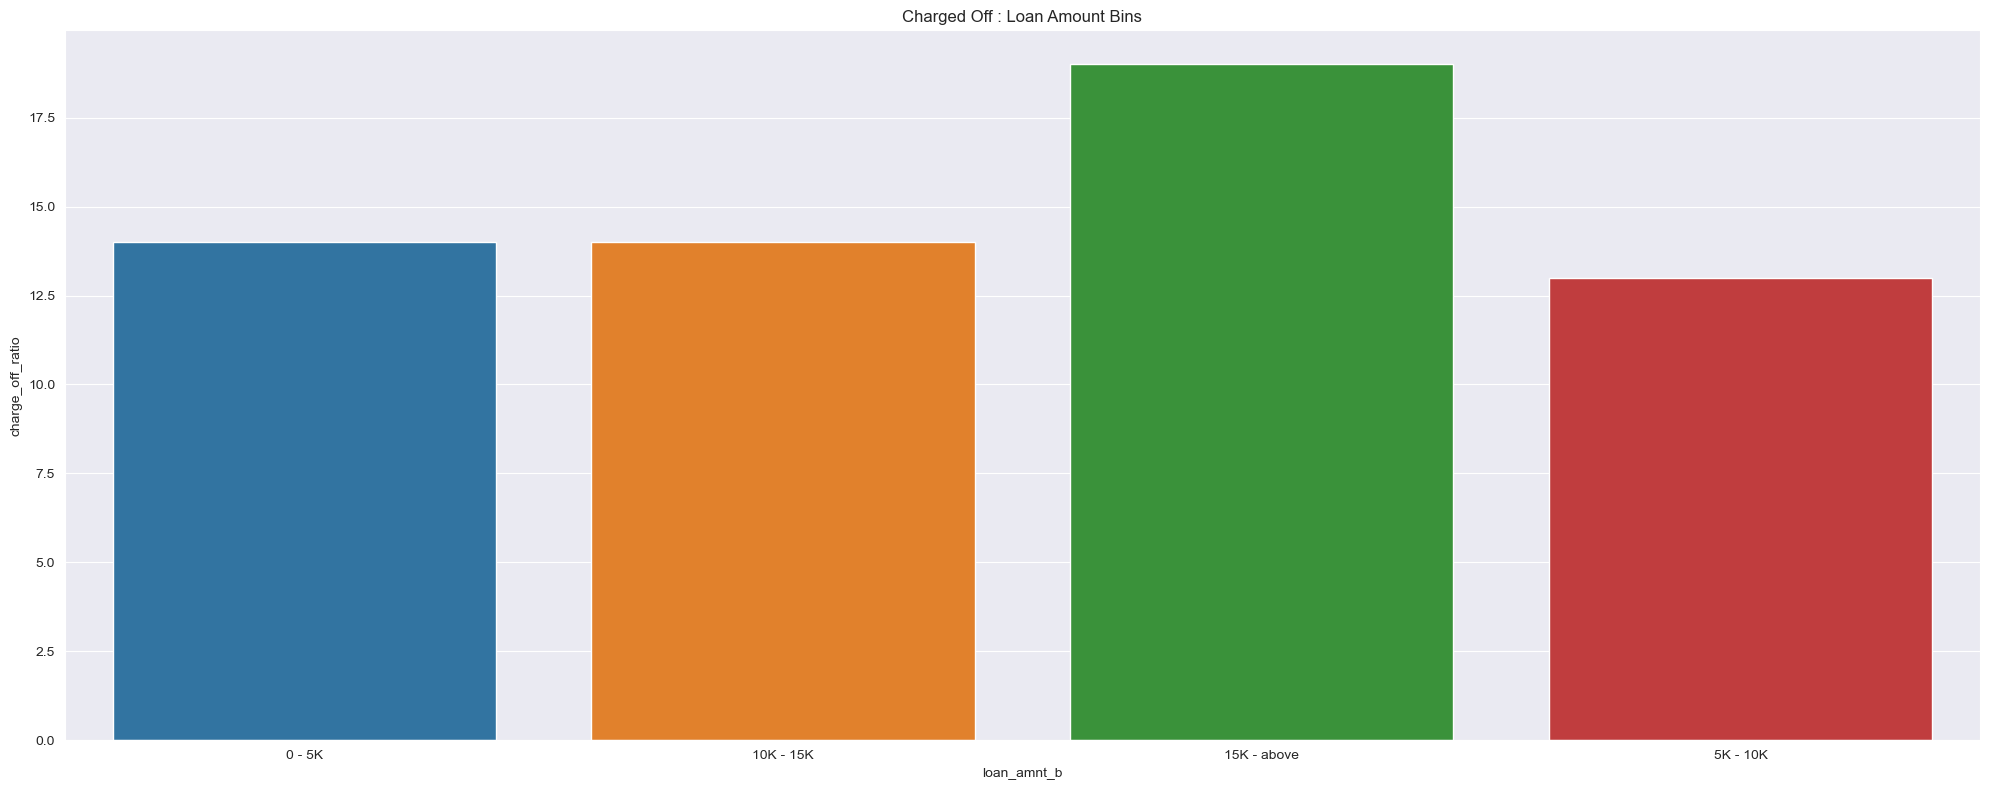

loan_status,loan_amnt_b,Charged Off,Fully Paid,total,charge_off_ratio
0,0 - 5K,1180,7520,8700,14.0
1,10K - 15K,954,6077,7031,14.0
2,15K - above,1063,4466,5529,19.0
3,5K - 10K,1503,10293,11796,13.0


In [109]:
## The ratio of Charge Offs within the category total
ratio_wise_plot(loan, 'loan_amnt_b')

## Outcome
- Based on volume highest percentage of Charge Offs are in the category of 5K to 10k of loan_ammount
- The Charge Off ratio of all the customer;s within the loan_amount of 15K and above is at the highest CHarge Off risk
## Inferences
- Charge Off risk of loan amount 15K and above is at the highest risk

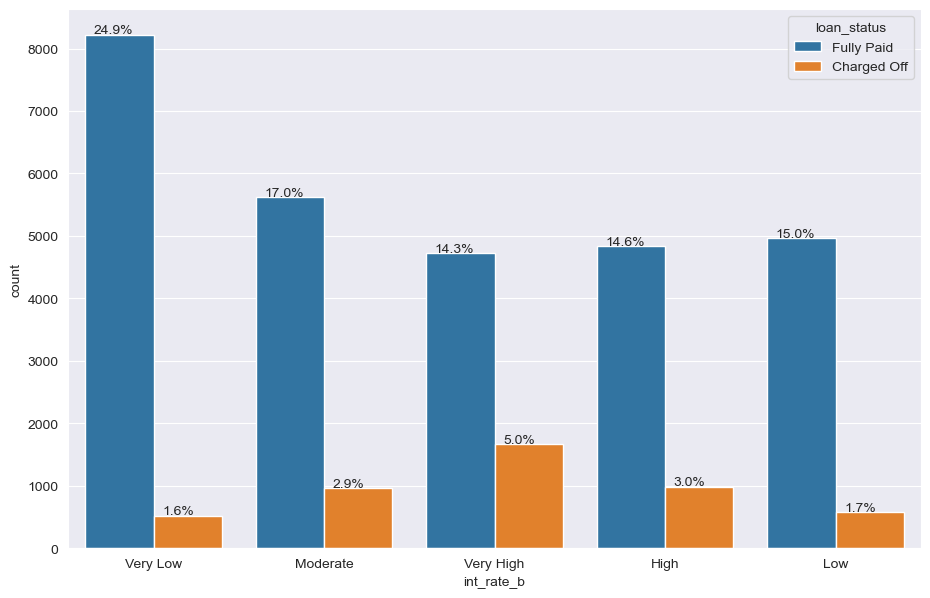

In [110]:
# Overall ratio of Charge Offs against the total
series_plot(loan, 'int_rate_b', 'loan_status')

## Interest Rate Bucket (int_rate_b)

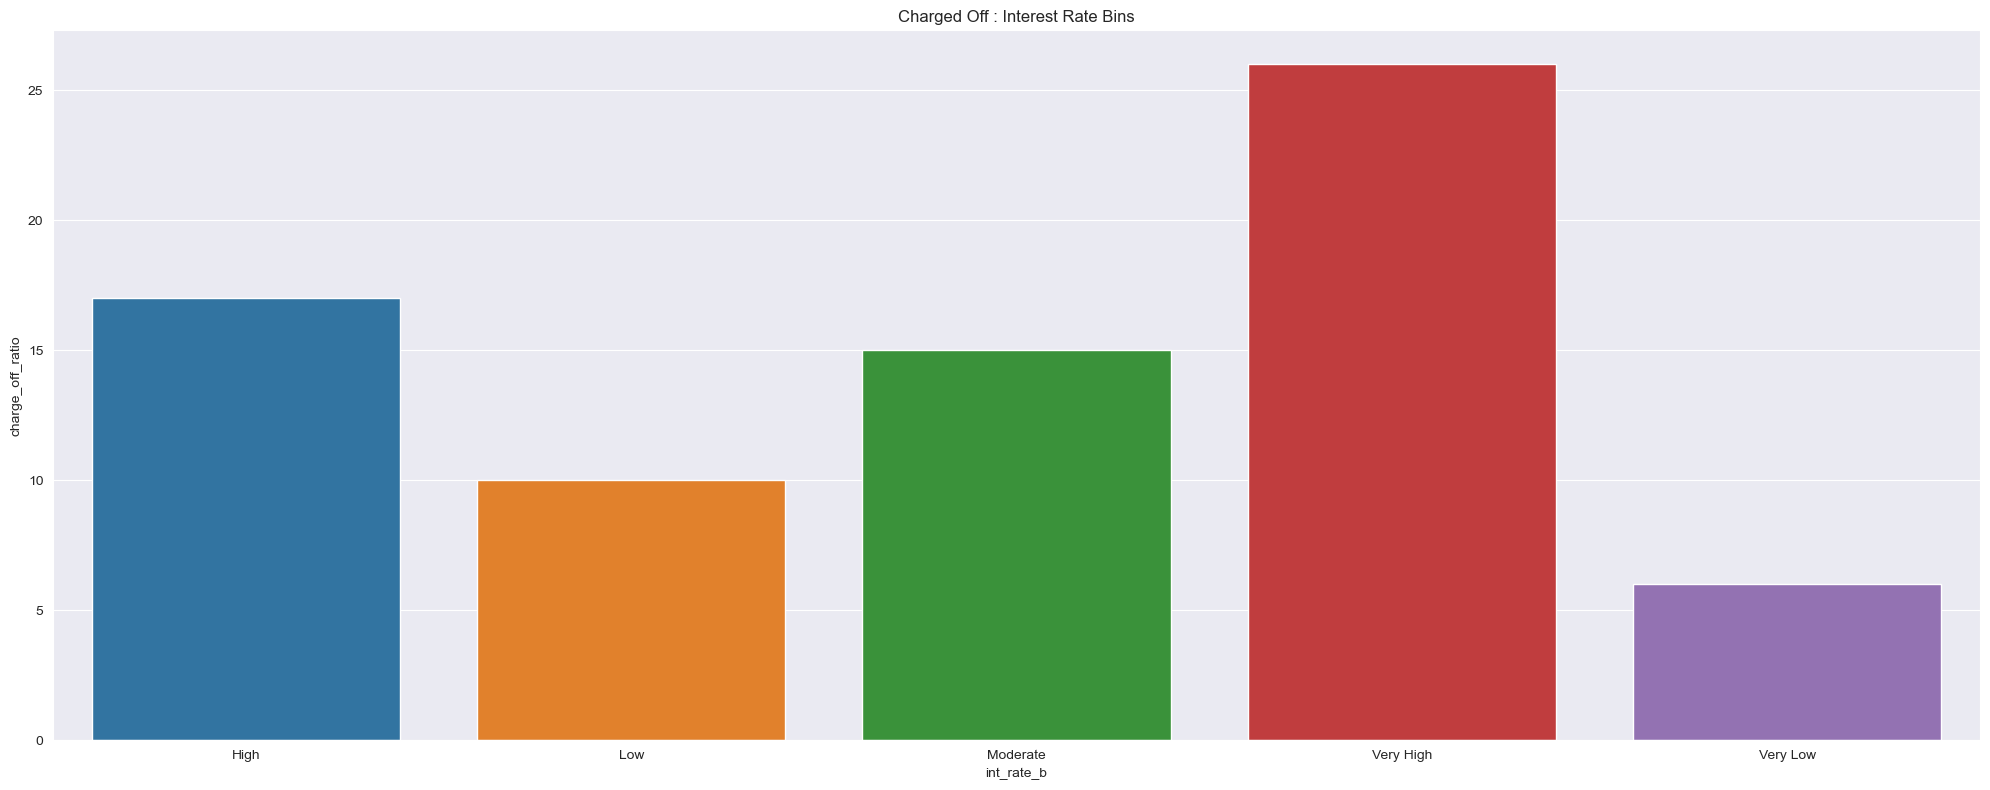

loan_status,int_rate_b,Charged Off,Fully Paid,total,charge_off_ratio
0,High,981,4837,5818,17.0
1,Low,578,4964,5542,10.0
2,Moderate,958,5618,6576,15.0
3,Very High,1665,4721,6386,26.0
4,Very Low,518,8216,8734,6.0


In [111]:
## The ratio of Charge Offs within the category total
ratio_wise_plot(loan, 'int_rate_b')

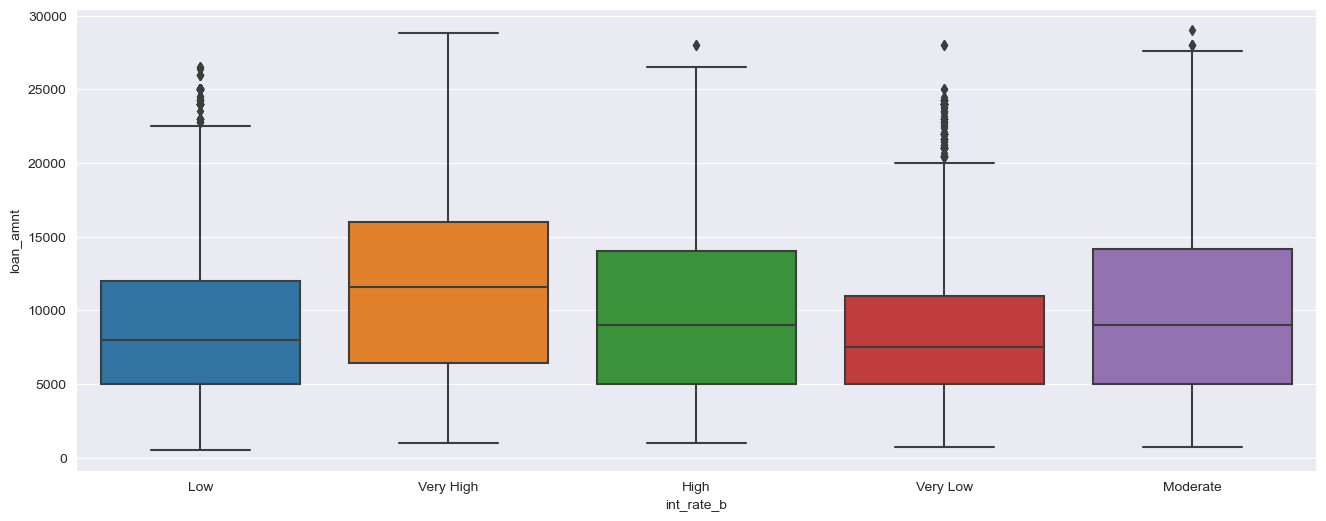

In [112]:
plot.figure(figsize=(16,6))
sea.boxplot(y=loan.loan_amnt,x=loan.int_rate_b)
plot.show()

- Based on volume and based on Charge Off ratio within the category, the Very High interest rates are in risk of Charge Off
- Very High interest rate is 15% and above

# Correlation Analysis

In [113]:
corr_loan = loan

In [114]:
# Printing column info to analyse missing values, empty values in a column
print(corr_loan.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33056 entries, 0 to 39680
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    33056 non-null  int64         
 1   loan_amnt             33056 non-null  float64       
 2   term                  33056 non-null  int64         
 3   int_rate              33056 non-null  float64       
 4   installment           33056 non-null  float64       
 5   grade                 33056 non-null  object        
 6   emp_length            33056 non-null  float64       
 7   home_ownership        33056 non-null  object        
 8   annual_inc            33056 non-null  float64       
 9   verification_status   33056 non-null  object        
 10  issue_d               33056 non-null  datetime64[ns]
 11  loan_status           33056 non-null  object        
 12  purpose               33056 non-null  object        
 13  zip_code        

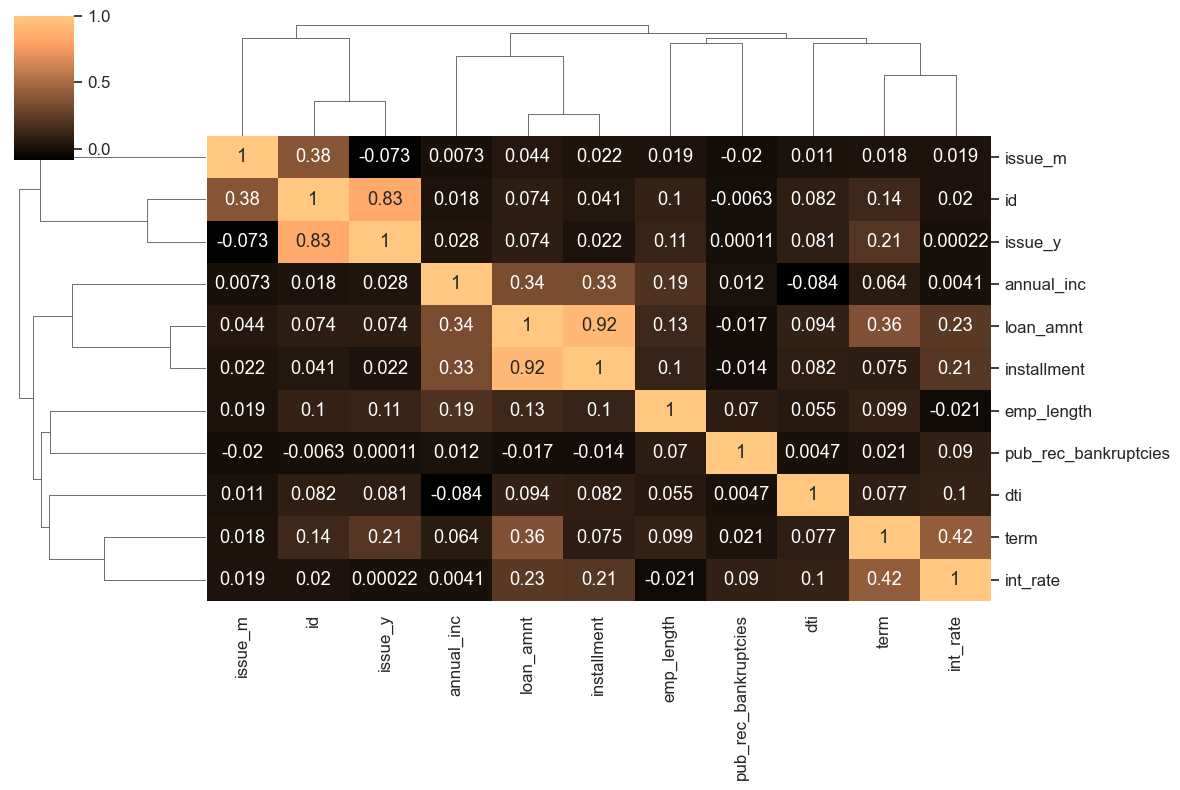

In [122]:
corr = corr_loan.corr()
sea.set(font_scale=1.1)
sea.clustermap(corr, annot=True, figsize=(12, 8), cmap="copper")
plot.show()

In [123]:
# Data-Cleanning
# Dropping redundant fields related to the 'loan_amnt'. They show high correlation in the corr-matrix
# Dropping fields id which do not contribute to analysis
# Dropping fields issue_y and issue_m
drop_columns = ['installment', 'id', 'issue_y', 'issue_m']
corr_loan = corr_loan.drop(columns=drop_columns)

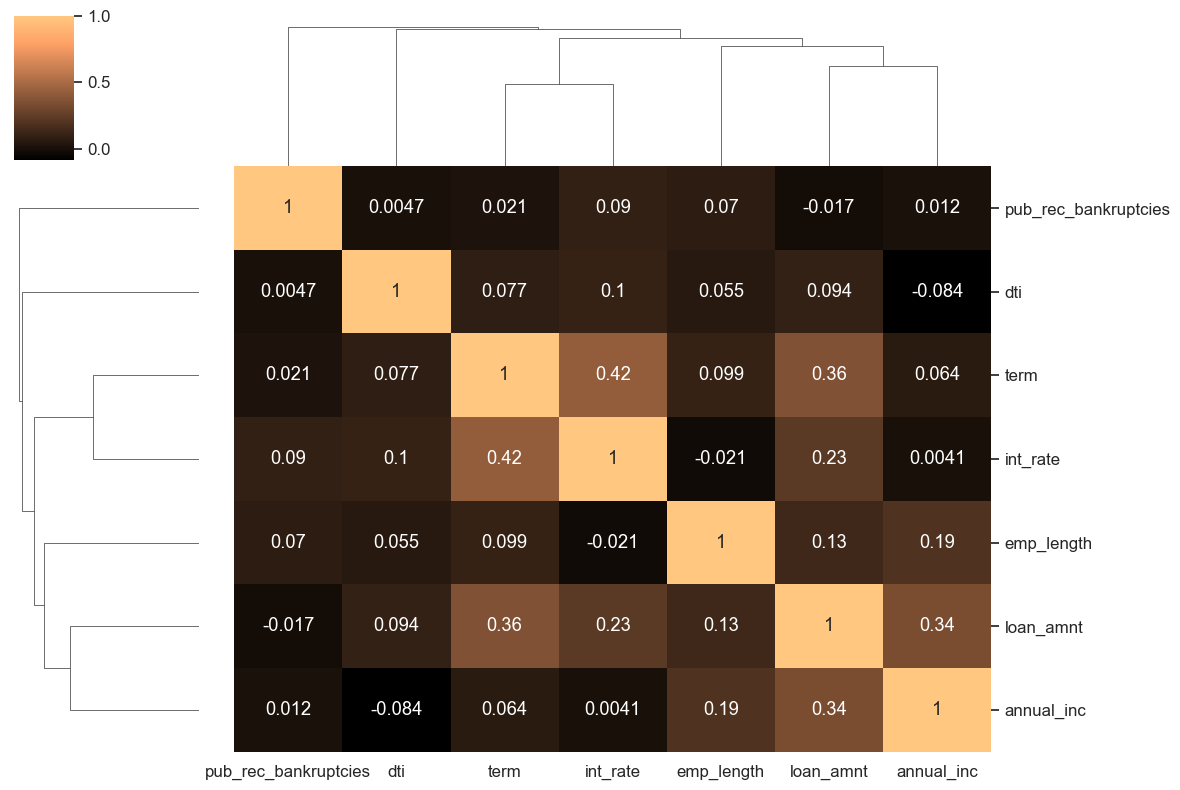

In [125]:
corr = corr_loan.corr()
sea.set(font_scale=1.1)
sea.clustermap(corr, annot=True, figsize=(12, 8), cmap="copper")
plot.show()

### Negative Correlation

- loan_amnt has negative correlation with pub_rec_bankrupticies
- annual income has a negative correlation with dti

### Strong Correlation
- term has a strong correlation with loan amount
- term has a strong correlation with interest rate
- annual income has a strong correlation with loan_amount
-
### Weak Correlation
- pub_rec_bankruptcies has weak correlation with most of the fields

<AxesSubplot:xlabel='term', ylabel='loan_amnt'>

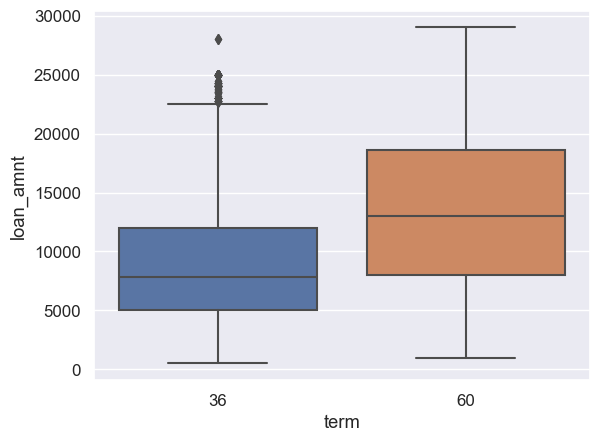

In [127]:
sea.boxplot(x = 'term', y = 'loan_amnt', data=corr_loan)

<AxesSubplot:xlabel='term', ylabel='int_rate'>

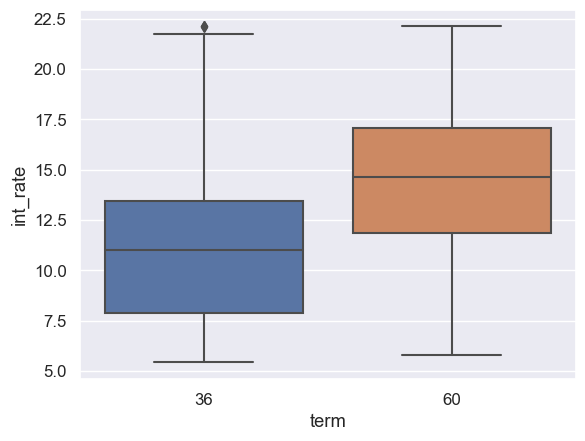

In [128]:
sea.boxplot(x = 'term', y = 'int_rate', data=corr_loan)

<AxesSubplot:xlabel='term', ylabel='int_rate'>

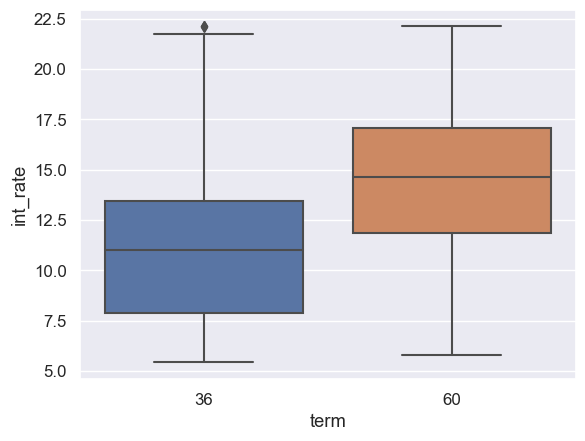

In [129]:
sea.boxplot(x = 'term', y = 'int_rate', data=corr_loan)

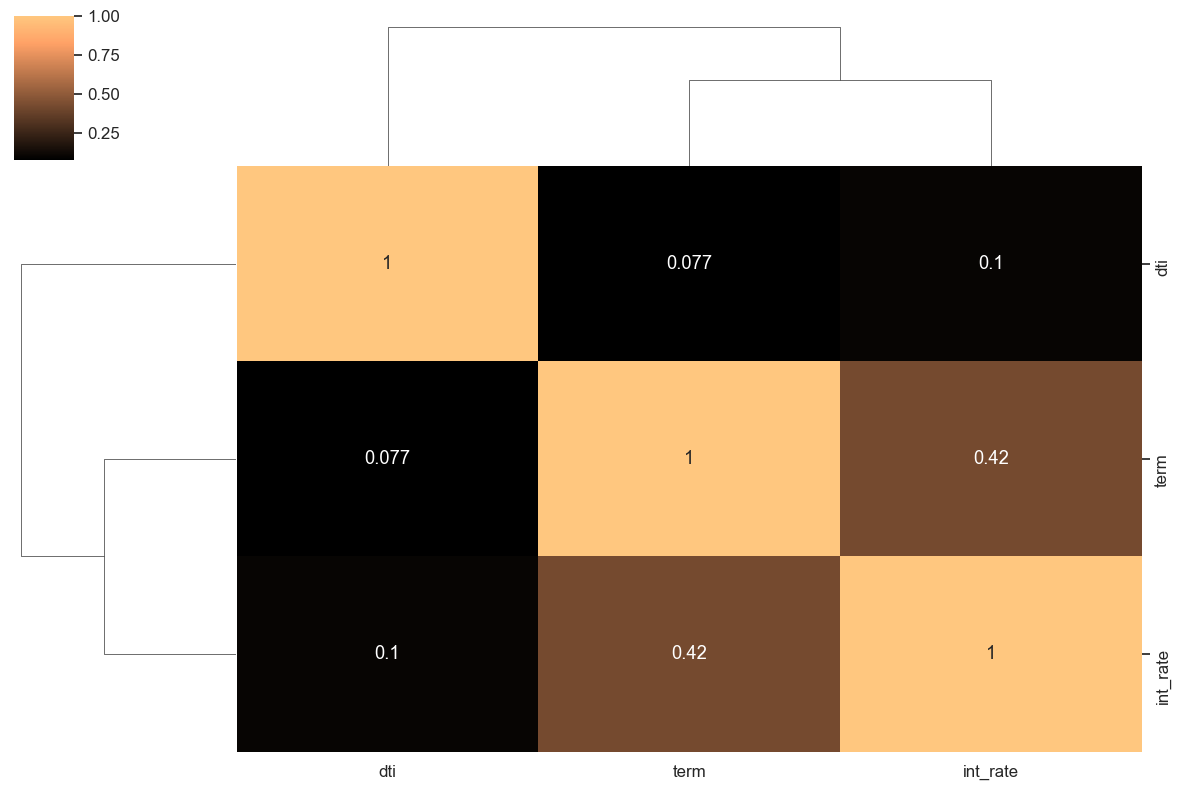

In [130]:
corr = corr_loan.loc[:, [ 'term', 'int_rate', 'dti']].corr()
sea.set(font_scale=1.1)
sea.clustermap(corr, annot=True, figsize=(12, 8), cmap="copper")
plot.show()

<Figure size 600x1000 with 0 Axes>

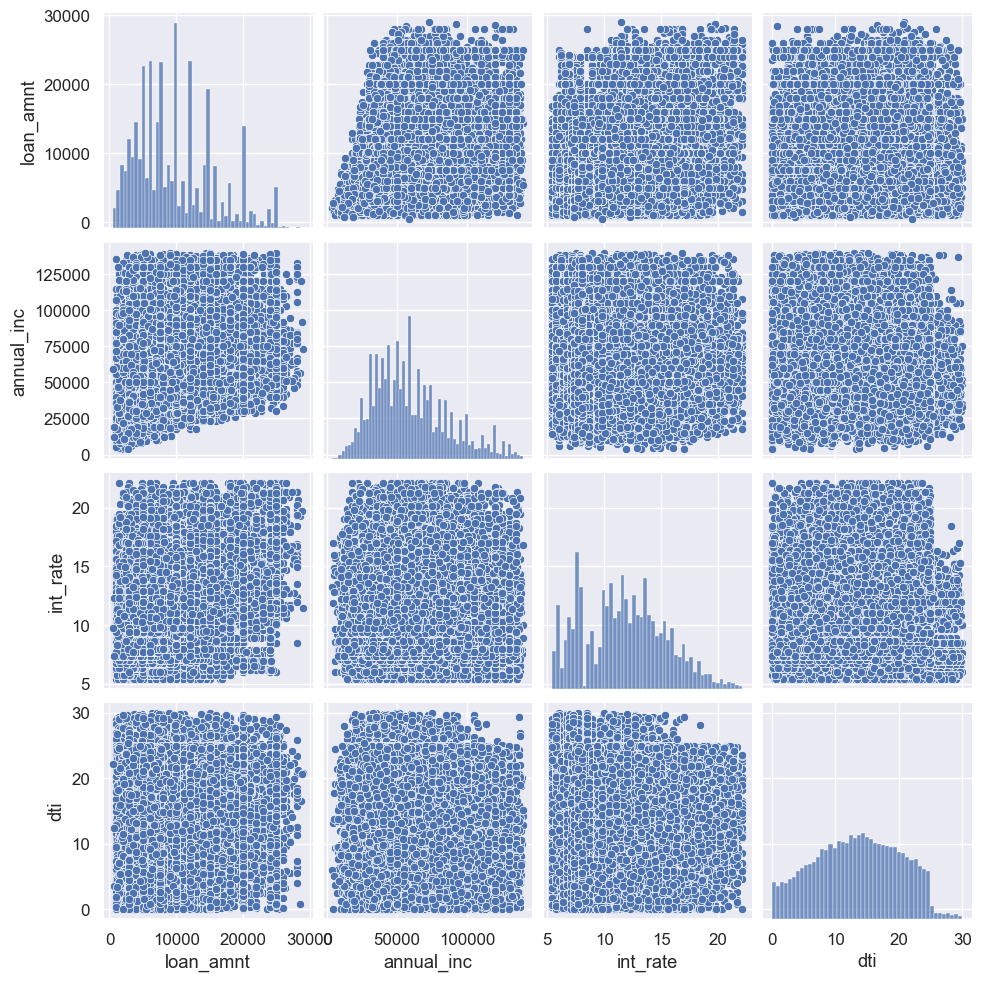

In [131]:
plot.figure(figsize=(6,10))
sea.pairplot(loan[['loan_amnt', 'annual_inc', 'int_rate', 'dti']])
plot.show()

# Recommendations Based on Analysis
- Borrowers who take loans for a term of 60 months are more likely to default.
- Borrowers with a "Verified" loan status who take high loan amounts with a 60-month tenure have a higher risk of defaulting.
- Borrowers who have "Rent" as their home ownership and take loans for the purpose of debt consolidation are at a higher risk of defaulting.
- Borrowers with an annual income of 0-20000 have a higher probability of defaulting.
- Borrowers who take loan amounts in the range of 0 to 14000 have a higher risk of defaulting.
- Borrowers who receive interest rates between 15-20% are more likely to default.
- Borrowers who take loans for the purpose of small business have a higher probability of defaulting.
- Borrowers with lower grades, i.e., F<G, are at a higher risk of defaulting.